# EDA HIGHLIGHT

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [EDA, R, Highlight]
- image: images/numpy_logo.png

In [2]:
library(tidyverse)

Warning message:
"패키지 'tidyverse'는 R 버전 4.1.3에서 작성되었습니다"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"패키지 'ggplot2'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tibble'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tidyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'readr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'purrr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'dplyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'stringr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'forcats'는 R 버전 4.1.3에서 작성되었습니다"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
options(repr.plot.width=16, repr.plot.height=8)

# Ch.1 R Language

- 생략

# Ch.2 Introduction to EDA

자료분석은 대체로 두 가지 단계로 나뉜다.

- 탐색적 자료분석(데이터의 구조와 특징 파악)

- 확증적 자료분석(모형, 재현성 평가)

## EDA(Exploratory Data Analysis)

- EDA는 데이터 특징과 내재하는 구조적 관계를 알아내기 위한 기법들을 통칭한다.

- 데이터를 특정한 모형에 적합시키기 보다는 데이터를 있는 그대로 보려는 데에 중점을 둔다.

## 4 Themes

EDA에서는 네 가지 주제가 때로는 홀로, 때로는 얽혀서 나타난다.

- 저항성(resistance)의 강조(예를 들어 평균보다는 일부자료의 파손에 저항적인 중위수가 바람직한 대표값 측도로서 선호된다.)

- 잔차(residual) 계산

- 자료변수의 재표현(re-expression)을 통한 다각적 시도

- 그래프를 통한 현시성(revelation)

## Summary (2)

- 자료분석은 탐색적 자료분석과 확증적 자료분석의 두 단계로 나눌 수 있다.

- EDA는 자료의 구조 및 특징의 파악을 목적으로 한다. 이를 위하여 효과적이고 신뢰성 있는 데이터의 요약과 그래프적 기법이 사용된다.

- EDA의 네 개 주제는 저항성, 잔차, 재표현, 현시성이다.

- 통계적 모형은 '진실'로서가 아니라 '주요 사례'로서 의미가 있다. 또한 모형과 데이터는 일방통행이 아닌 쌍방통행으로 이해되어야 한다. 데이터와 분석도 사이클을 이룬다.

# Ch.3 Stem and Leaf

## Stem and Leaf

데이터의 값을 십 단위인 줄기(stem)와 일 단위인 잎(leaf)으로 분리한다.

`-` 장점

- 사분위수나 중앙값을 찾기 쉽다.

- 분포의 전체적인 모양(봉우리 개수, 대칭분포, 치우친 방향)을 쉽게 알 수 있다.

- 이상값 유무를 파악할 수 있다.

`-` 단점

- 자료가 많은 경우에는 부적합하고 자료의 수가 50개 이하일 때 적합하다.

In [35]:
exam1 = read.table('dataset/EDA/exam1.txt', header = TRUE)
head(exam1)

,hw,score
,<int>,<int>
1,0,54
2,0,51
3,1,52
4,0,82
5,1,37
6,1,41


In [13]:
stem(exam1$score)


  The decimal point is 1 digit(s) to the right of the |

  0 | 00
  1 | 058
  2 | 1333458889
  3 | 0355789
  4 | 11133456678
  5 | 11122233344456688
  6 | 147779
  7 | 33478
  8 | 29
  9 | 09



- 이 줄기그림의 주요 특징은 이봉분포의 모습을 보인다는 점이다. 이것은 자료가 2개의 군집으로 되어 있음을 말한다.

In [22]:
# 과제 제출 여부에 따른 시험 점수

exam1[exam1$hw == 0, ]$score %>% stem # 과제 미제출자
exam1[exam1$hw == 1, ]$score %>% stem # 과제 제출자


  The decimal point is 1 digit(s) to the right of the |

  0 | 00
  1 | 05
  2 | 13334589
  3 | 0355
  4 | 13378
  5 | 122333446
  6 | 4
  7 | 3
  8 | 29


  The decimal point is 1 digit(s) to the right of the |

  1 | 8
  2 | 88
  3 | 789
  4 | 114566
  5 | 11245688
  6 | 17779
  7 | 3478
  8 | 
  9 | 09



과제 제출 여부에 따라서 줄기-잎 그림을 두 개 그려본 결과 흥미로운 점을 확인했다.

과제 미제출자에 경우 여전히 이봉분포를 띄고 있으나 과제 제출자의 경우 단봉분포를 띄고 있다.

이것은 과제물 미제출 그룹이 서로 이질적인 어떤 두 집단(50점대를 중심으로 하는 집단과 20점대를 중심으로 하는 집단)의 혼합임을 말하여 준다.

아마 전자는 학업습관이 불성실하나 학업능력은 우수한 집단이고 후자는 학업습관과 학업능력 모두 좋지 않은 학생들의 집단이 아닐까 생각해본다.

> Tip : R에서 줄기 수를 줄이거나 늘이려면 stem() 함수 내 scale 파라미터를 조정하면 된다.

In [25]:
stem(exam1$score, scale = 0.5) # 줄기 수를 절반으로 줄인다.


  The decimal point is 1 digit(s) to the right of the |

  0 | 00058
  2 | 13334588890355789
  4 | 1113345667811122233344456688
  6 | 14777933478
  8 | 2909



이 줄기 그림은 단봉분포의 형태를 취한다. 이것은 너무 단순하여 이 자료의 주요 특성을 잃은 것으로 볼 수 있다. 

즉 2개의 봉우리를 구분하지 못하고 1개만 본 것이다.

In [26]:
stem(exam1$score, scale = 2) # 줄기 수를 두 배로 늘인다.


  The decimal point is 1 digit(s) to the right of the |

  0 | 00
  0 | 
  1 | 0
  1 | 58
  2 | 13334
  2 | 58889
  3 | 03
  3 | 55789
  4 | 111334
  4 | 56678
  5 | 111222333444
  5 | 56688
  6 | 14
  6 | 7779
  7 | 334
  7 | 78
  8 | 2
  8 | 9
  9 | 0
  9 | 9



줄기 수를 늘였더니 더 많은 봉우리를 볼 수 있다.

일반적으로 줄기 수를 늘이면 늘일수록 많은 수의 봉우리를 보게 되고 그 반대로 줄기 수를 줄이면 줄일수록 적은 수의 봉우리를 보게 된다.

## Compared with Histogram

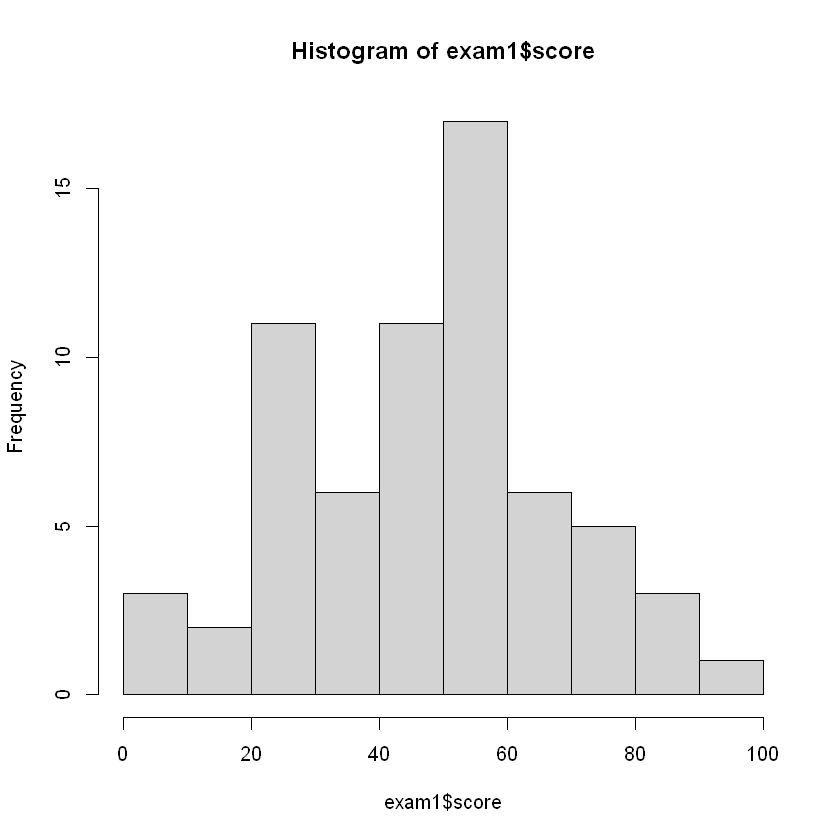

In [29]:
hist(exam1$score)

|        |줄기 - 잎|히스토그램|
|--------|--------|----------|
|정보 손실|손실되지 않음|손실됨|
|줄기 수 변환|쉬움|어려움|
|구간의 폭|조정 불가능|조정 가능|

## Summary (3)

- 줄기 그림은 히스토그램과 마찬가지로 자료 분포의 특성을 그래프화한 것이다. 줄기 그림은 히스토그램에 비하여 정보의 보전 면에서 우수하며 쉽게 구간(줄기) 수를 늘이거나 줄일 수 있다. 그러나 구간(줄기)의 선정시 제약이 따른다.

- 적절한 줄기 그림을 그리기 위하여 여러 개의 그림을 그려보고 비교해 보아야 한다. 계획된 시행착오가 필요하다.

- 줄기 그림에서는 다음과 같은 자료의 특성을 관찰할 수 있다.

  - 군집의 수
  - 집중도가 높은 구간
  - 대칭성 여부
  - 자료의 범위 및 산포
  - 특이점의 존재여부

# Ch.4 Numerical Summary and Box Plot

## Mean and Median

![](https://miro.medium.com/max/754/0*wHMvuwRa_YF9SFwY.png)

- 한 쪽 꼬리가 긴 분포에서 평균값은 쉽게 휘둘리지만 중앙값은 쉽게 휘둘리지 않다. 따라서 중앙값이 대표값으로서 적합하다.

$\begin{cases}
X_{\frac{N+1}{2}} \qquad if N = odd\\ \\
\dfrac{X_{\frac{N}{2}} + X_{\frac{N}{2} + 1}}{2} \qquad if N = even
\end{cases}$

중간값의 깊이 $d(M)$은

$d(M) = \dfrac{(N+1)}{2}$

## Five Number Summary

아래 4분위수 : $H_L$
중간값 : $M$
위 4분위수 : $H_U$

**다섯 숫자 요약 = (min, $H_L, M, H_U$, max) = (최솟값, 제 1사분위수, 중앙값, 제 3사분위수, 최댓값)**

In [41]:
summary(exam1$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   33.00   48.00   47.23   58.00   99.00 

## Skewness

**왜도** **=** $SKEW = \dfrac{(H_U - M) - (M - H_L)}{(H_U - M) + (M - H_L)}$

**왜도** < 0 이면 왼쪽으로 기울어진 분포

**왜도** > 0 이면 오른쪽으로 기울어진 분포

## Quantiles

In [97]:
low = quantile(exam1$score, c(1/2, 1/4, 1/8, 1/16), type = 8) %>% as.numeric %>% round(2)# 중간값, 아래 4분위수, 아래 8분위수, 아래 16분위수
high = quantile(exam1$score, c(1/2, 3/4, 7/8, 15/16), type = 8) %>% as.numeric %>% round(2) # 중간값, 위 4분위수, 위 8분위수, 위 16분위수

values = cbind(low, high, (low+high)/2, high-low)
colnames(values) = c('low', 'high', 'mid', 'spr')
rownames(values) = c('M', 'H', 'E', 'D')

values

,low,high,mid,spr
M,48.00,48.00,48.00,0.00
H,32.00,58.00,45.00,26.00
E,23.00,73.00,48.00,50.00
D,16.25,80.33,48.29,64.08


## KURTO

# Ch.5 Data Re-Expression

## 멱승, 로그, 지수 변환에 의한 재표현

## Standardization

- 표준화 변환이란 통상적으로 한 자료묶음의 `평균이 0, 표준편차가 1이 되도록 하는 선형변환`을 말한다.

$x_1, x_2, \dots, x_n$을 자료 값이라고 할 때 이것의 표준화변환 $z_1, z_2, \dots, z_n$은 다음과 같이 정한다.

$z_i = \dfrac{x_i - \bar{x}}{s_x}, \, i = 1,2, \dots,n. \qquad(1)$

그런데 (1)은 로버스트하지 않은 $\bar{x}$와 $s_x$에 의존하므로 EDA의 관점에서는 믿고 사용하기 어렵다. [^1]

- 왜냐하면 표본평균과 표본표준편차는 극단적인 이상점에 의해 크게 변동될 수 있기 때문이다.
- 그러나 중앙값 또는 사분위수범위(IQR)은 비교적 로버스트하다. 

즉, 평균 $\bar{x}$ 대신에 중앙값 $med_x$를, 표준편차 $s_x$ 대신에 사분위수범위 $IQR$을 보정한 $\tilde{\sigma_x} = \dfrac{IQR}{1.35}$을 쓰는 것이 좋을 것이다.

따라서 로버스트 표준화 변환은 다음과 같다.

$\bar{z_i} = \dfrac{x_i - med_x}{\tilde{\sigma_x}}\, i = 1,2, \dots,n. \qquad(1)$

표준화 변환을 사용하는 예시 상황은 다음과 같다.

In [1]:
#hide_input
print('A 그룹 학생 100명의 시험 X 점수는 N(40,10)으로부터 생성되었다.')
print('B 그룹 학생 90명의 시험 Y 점수는 N(40,10)으로부터, 나머지 10명의 시험 Y 점수 N(80,5)으로부터 생성되었다.')

[1] "A 그룹 학생 100명의 시험 X 점수는 N(40,10)으로부터 생성되었다."
[1] "B 그룹 학생 90명의 시험 Y 점수는 N(40,10)으로부터, 나머지 10명의 시험 Y 점수 N(80,5)으로부터 생성되었다."


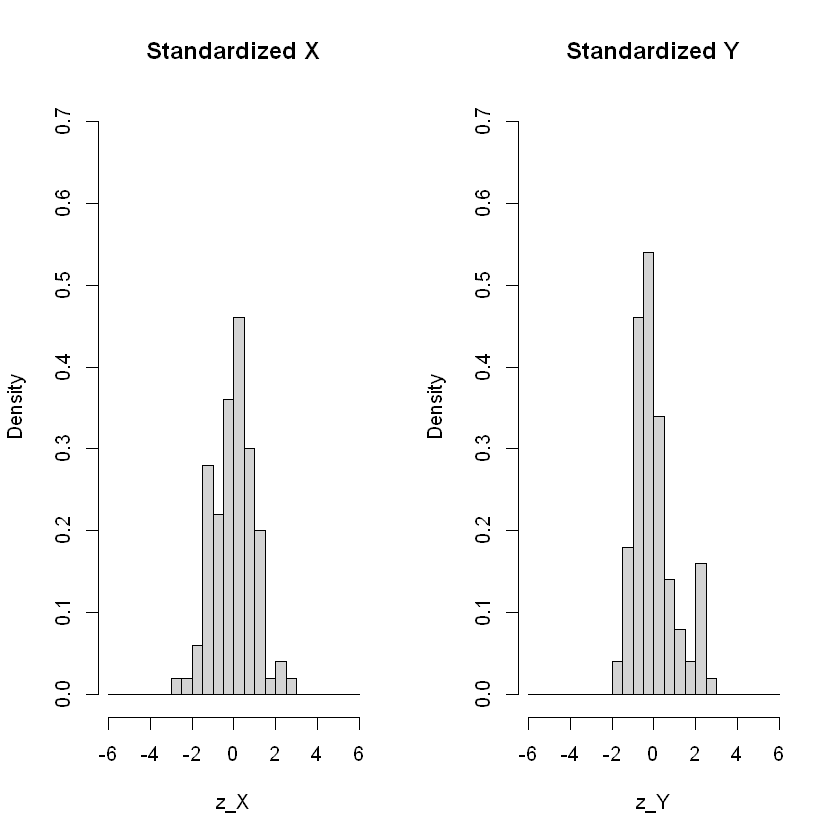

In [22]:
# 표준화 변환

par(mfrow = c(1,2))
X_group <- rnorm(100, 40, 10)
Y_group <- c(rnorm(90,40,10), rnorm(10,80,5))

z_X <- (X_group-mean(X_group))/sd(X_group)
z_Y <- (Y_group-mean(Y_group))/sd(Y_group)
hist(z_X, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Standardized X')
hist(z_Y, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Standardized Y')

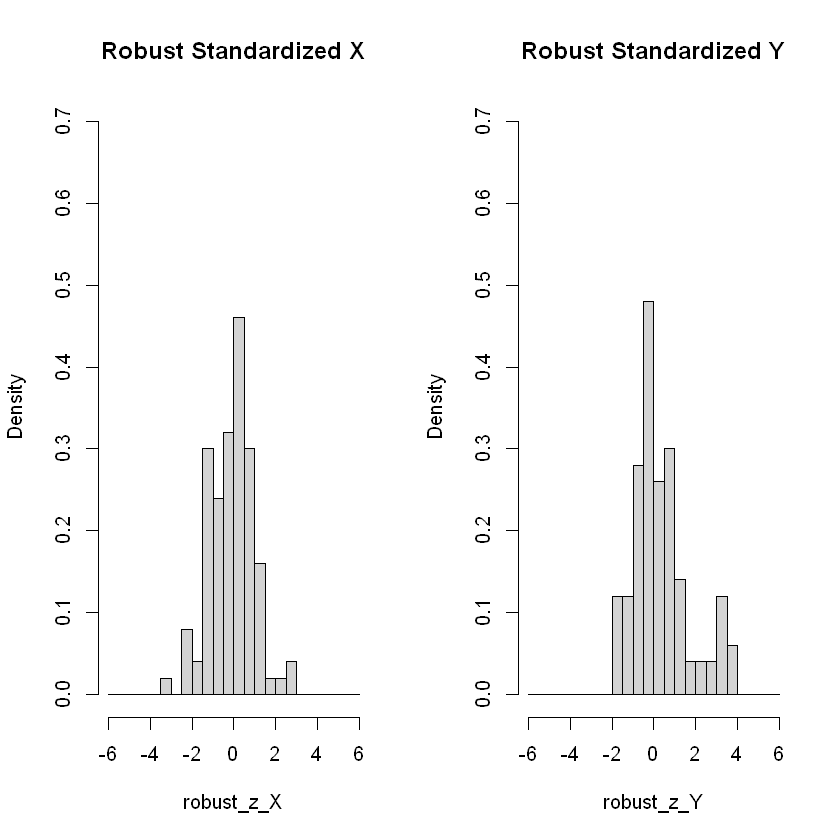

In [23]:
# 로버스트 표준화 변환

par(mfrow = c(1,2))
robust_z_X <- (X_group-median(X_group))/(IQR(X_group)/1.35)
robust_z_Y <- (Y_group-median(Y_group))/(IQR(Y_group)/1.35)
hist(robust_z_X, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Robust Standardized X')
hist(robust_z_Y, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Robust Standardized Y')

## Summary (5)

- 선형변환 $ax+b\, (a > 0)$은 분포의 형태를 바꾸지 않는다. 그러나 비선형변환은 분포의 형태를 바꾼다.

- 변환의 사다리는 $x^p$ 꼴의 파워(power, 멱승)형 변환을 일컫는데 변환의 사다리를 내려가면 $(p < 1)$ 오른쪽 꼬리가 짧아진다. $p=0$에 해당하는 변환은 로그변환이다.

- 자료의 재표현은 분포의 대칭화를 위하여, 또는 자료묶음들의 산포를 균일화하기 위한 목적으로 실행된다.

- 자료의 재표현은 자료 해석을 풍부하게 한다.

# Ch.6 QQ-Plot

## Various Patterns

### Normal Distribution

- 정규분포로부터의 모의생성 자료에 대한 정규확률 플롯
  - 대체로 직선적인 경향선을 확인할 수 있다.
  - 직선의 절편과 기울기가 각각 100과 15 근처임을 확인할 수 있다.

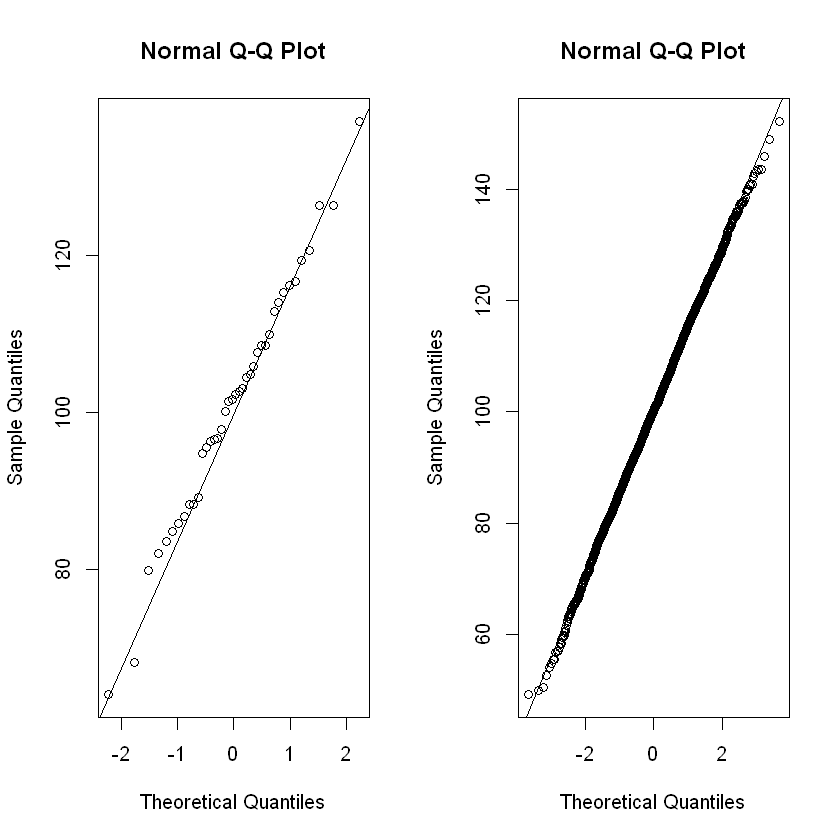

In [15]:
par(mfrow = c(1,2))
x1 <- rnorm(40, 100, 15)
qqnorm(x1)
qqline(x1)

x2 <- rnorm(4000, 100, 15)
qqnorm(x2)
qqline(x2)

### Mixture Normal Distribution

- 혼합 정규분포로부터의 모의생성 자료에 대한 정규확률 플롯
  - 중앙에서 밀도가 낮다.
  - 우상과 좌하 부분에서 강한 곡선성을 볼 수 있다.

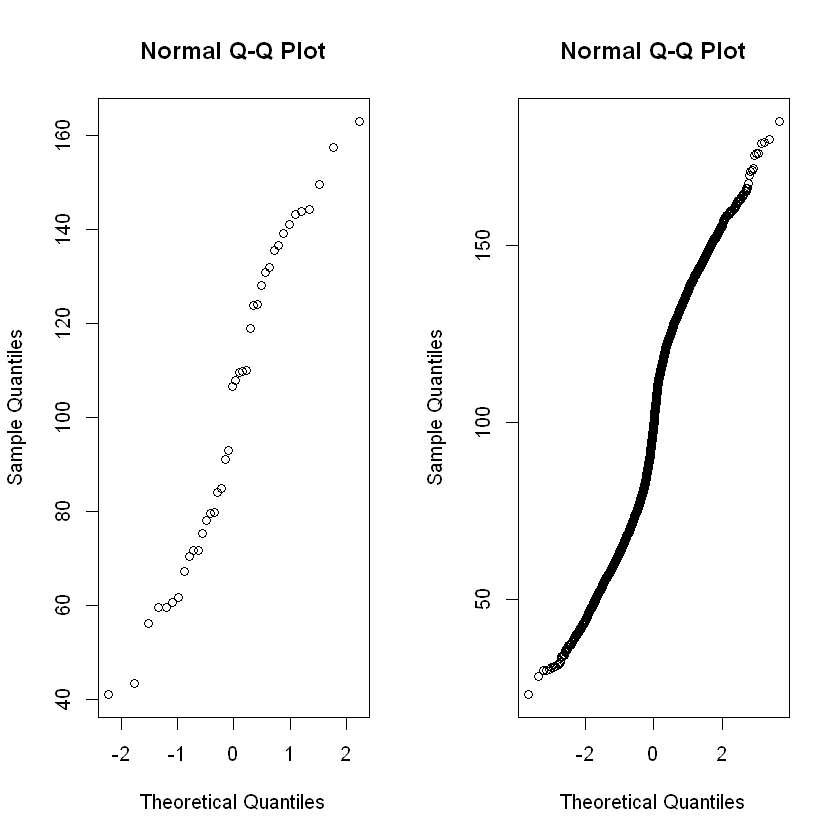

In [17]:
par(mfrow = c(1,2))
x1 <- c(rnorm(20, 70, 15), rnorm(20, 130, 15))
qqnorm(x1)

x2 <- c(rnorm(2000, 70, 15), rnorm(2000, 130, 15))
qqnorm(x2)

### Data with outliers

- 특이값이 내재하는 모의생성 자료에 대한 정규확률 플롯
  - 25, 175가 이상점으로 존재한다.
  - 25는 주경향선보다 아래에 있다.
  - 175는 주경향선보다 위에 있다.

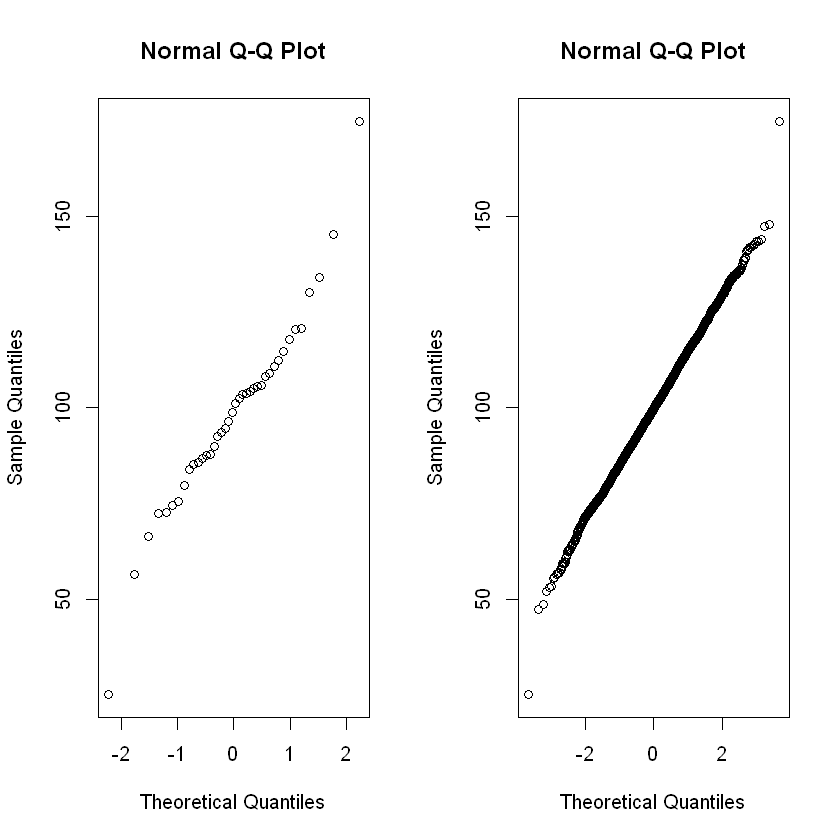

In [34]:
par(mfrow = c(1,2))
x1 <- rnorm(38, 100, 15)
outliers <- c(25, 175)
qqnorm(c(x1, outliers))

x2 <- rnorm(3800, 100, 15)
qqnorm(c(x2, outliers))

### Short Tail

- 꼬리가 짧은 분포로부터의 모의생성 자료에 대한 정규확률 플롯
  - 플롯의 전체적 모양이 비스듬한 S자 성장곡선의 형태를 취하고 있음을 볼 수 있다.

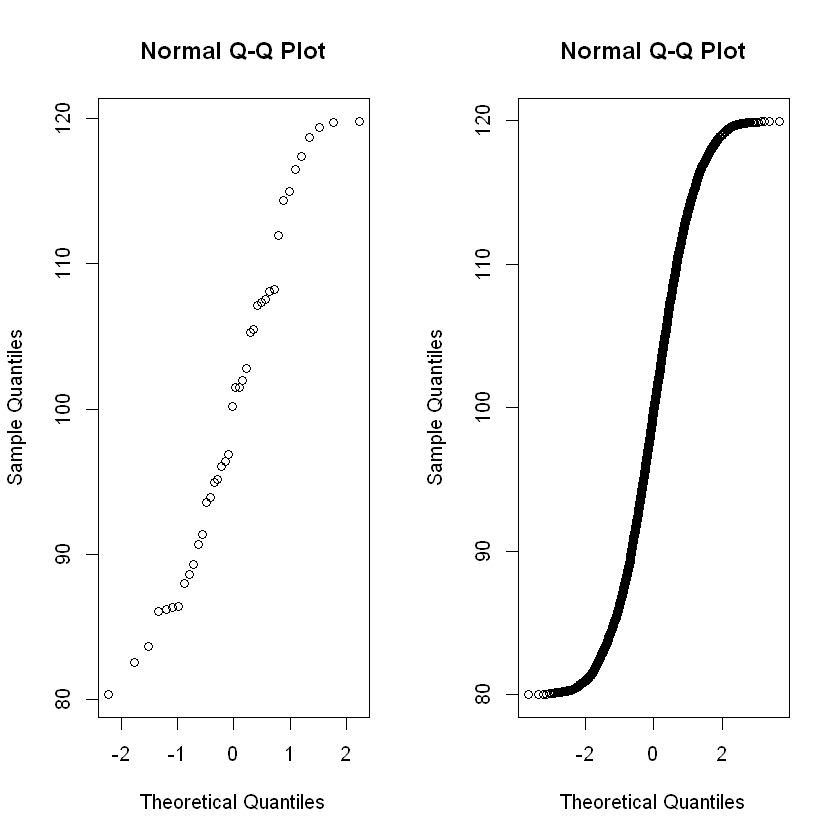

In [28]:
par(mfrow = c(1,2))
x1 <- runif(40, 80, 120)
qqnorm(x1)

x2 <- runif(4000, 80, 120)
qqnorm(x2)

### Long Tail

- 꼬리가 긴 분포로부터의 모의생성 자료에 대한 정규확률 플롯
  - 플롯의 전체적인 모양이 비스듬한 역 S자 성장곡선의 형태를 취하고 있음을 볼 수 있다.

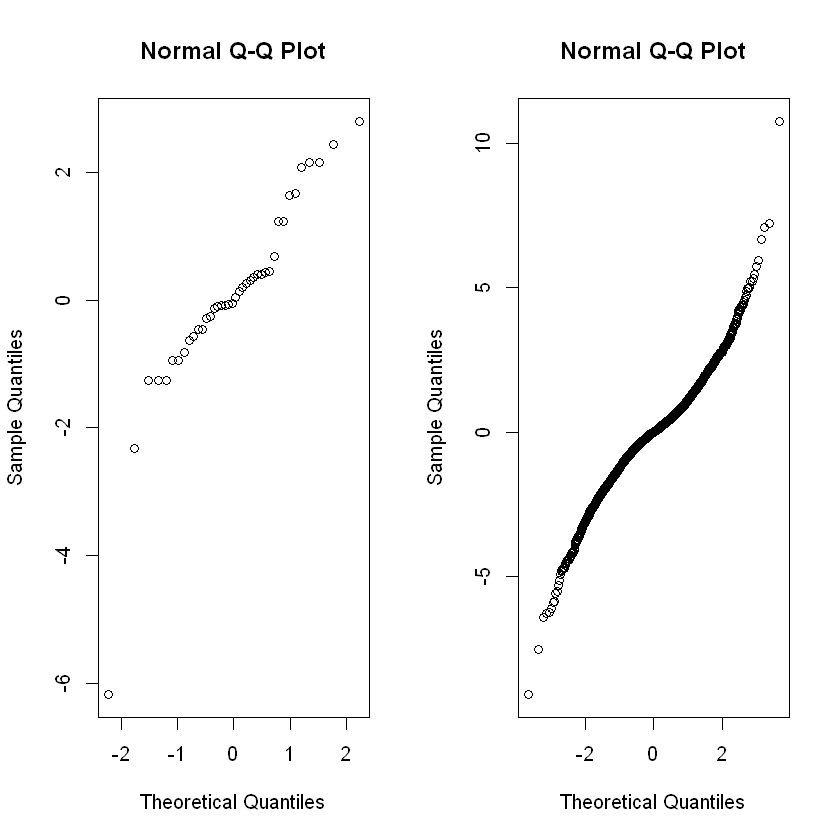

In [39]:
par(mfrow = c(1,2))
x1 <- c(rexp(20,1), -rexp(20,1))
qqnorm(x1)

x2 <- c(rexp(2000,1), -rexp(2000,1))
qqnorm(x2)

### Right Skewed

- 큰 값 쪽으로 긴 꼬리를 뻗은 기울어진 분포의 경우
  - 비스듬히 기울어진 J자 곡선의 형태임을 볼 수 있다.

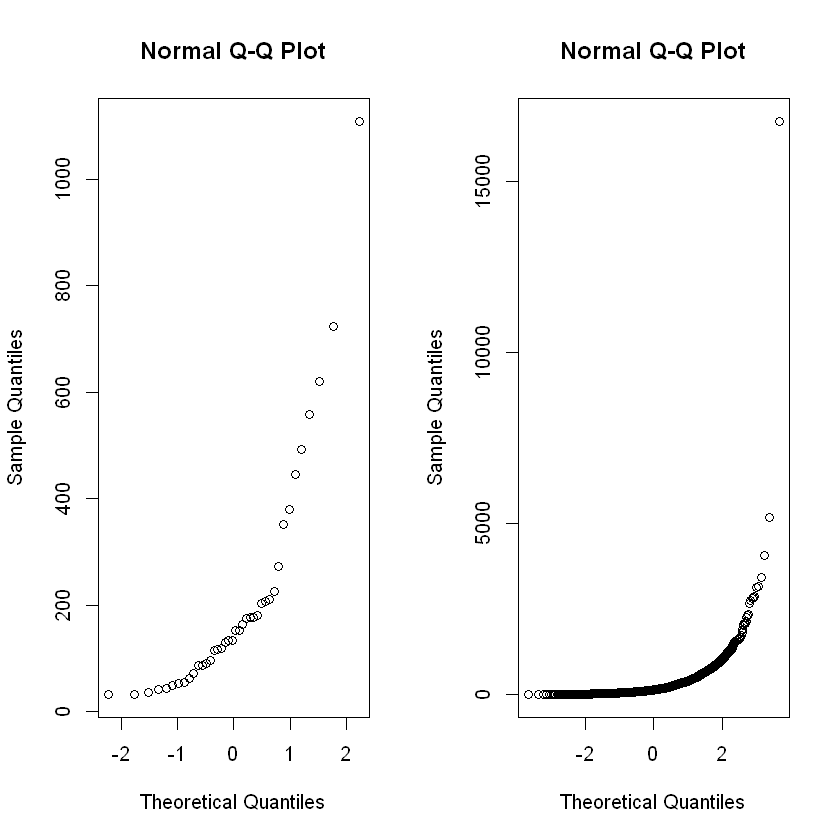

In [50]:
par(mfrow = c(1,2))
x1 <- exp(rnorm(40, 5, 1))
qqnorm(x1)

x2 <- exp(rnorm(4000, 5, 1))
qqnorm(x2)

### Left Skewed

- 작은 값 쪽으로 긴 꼬리를 뻗은 기울어진 분포의 경우
  - 비스듬히 기울어진 역 J자 곡선의 형태임을 볼 수 있다.

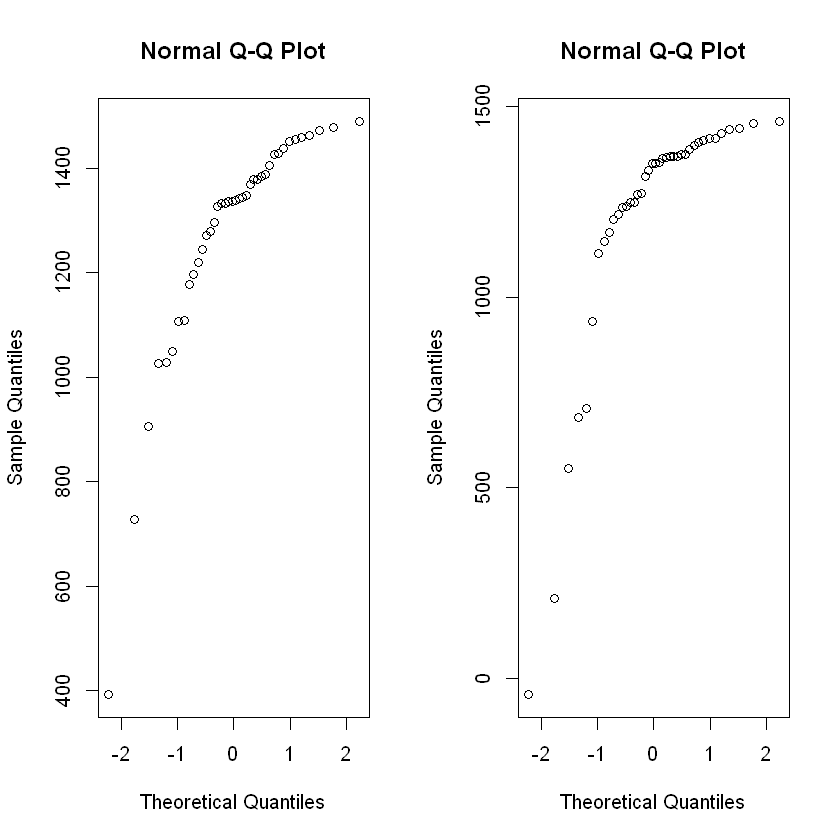

In [73]:
par(mfrow = c(1,2))
x1 <- 1500 - exp(rnorm(40,5,1))
qqnorm(x1)

x2 <- 1500 - exp(rnorm(40,5,1))
qqnorm(x2)

## Example

- 백혈병 환자 21명의 생존시간에 관한 다음의 자료를 지수분포에 적합하여 보자.

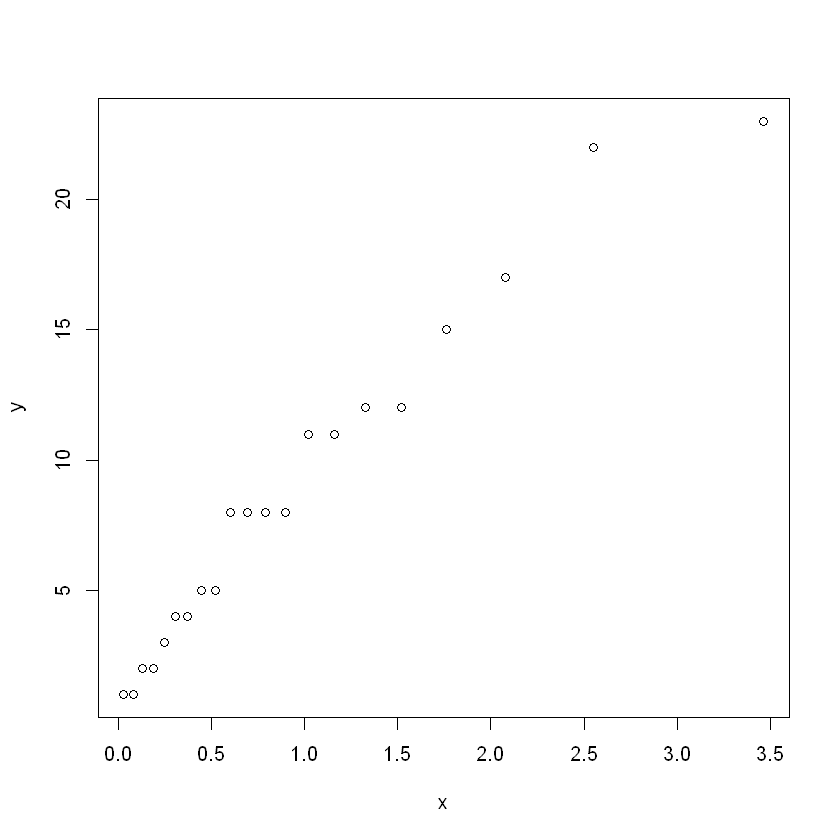

In [88]:
leukemia <- c(1,1,2,2,3,4,4,5,5,8,8,8,8,11,11,12,12,15,17,22,23)

leukemia_quant = ((1:length(leukemia)) - 1/3) / (length(leukemia) + 1/3)
x <- -log(1-leukemia_quant)
y <- sort(leukemia)

plot(y ~ x)

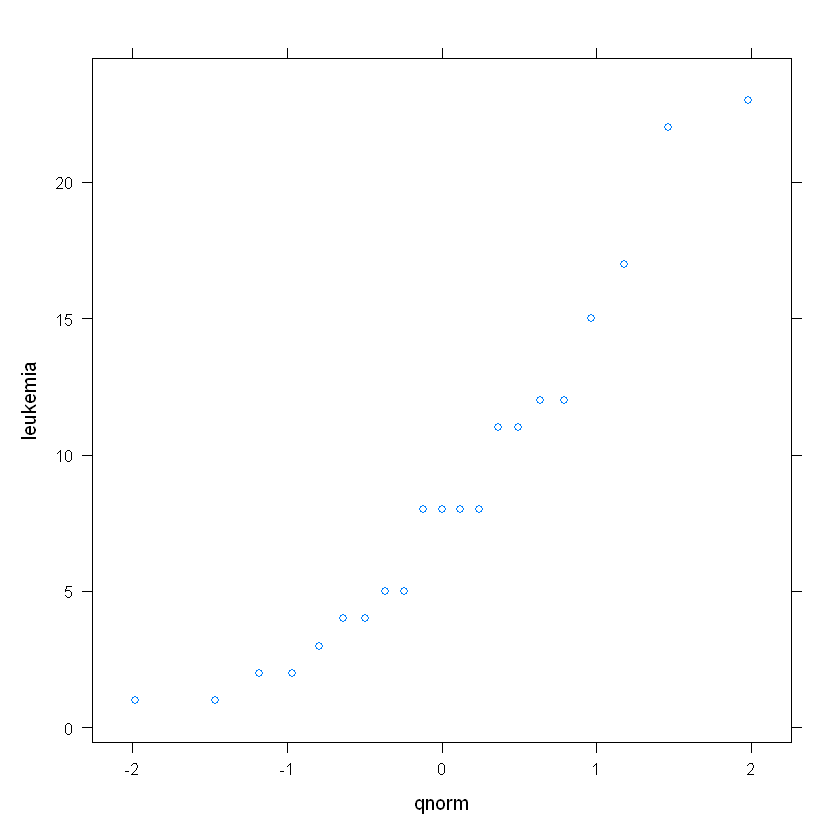

In [87]:
library(lattice)
qqmath(leukemia)

# Ch.7 2원 자료, 빈도 표의 탐색

## 2원 자료 표의 분해

평균과 같은 추정치는 특이값에 의해 쉽게 영향을 받으므로 EDA적 관점에서 보면 바람직하지 않다.

따라서 평균을 중간값으로 대체하고 다듬을 필요가 있다.

R 함수
```{r}
medpolish(world_temp)
```

7장 이원자료빈도표, 

7.4절 

8장 시계자료탐색 표 데이터주고 3할 구하기 등, 스필트해보기 등, 

149페이지 표3에 대한거 스필트해보기 등, 

147페이지 

19.5 봉우리인지 골자기인지, 봉우리를 스필트해라, 

8.5 자기 상관과 가중치? 여기서 그림이 의미하는 바, hf? 자기상관 교차상관, 

9장 

165 lms lts ,

167 lts, 

10장 그림을 그려서 알수잇는게 뭐냐 

182 밀감 추정? 데이터 주고 커널 밀도 추정해봐라 계산해서 그려봐라 계산기 필요!  도자기 플룻 한번 보기 

11장 가변량 자료 여러가지 데이터를 주고 평행자료 같은거 주면 해석하기 그림을 그리고 해석하라 알수잇는게 뭐냐 정도

In [ ]:
world_temp <- read.table('dataset/EDA/WorldTemperature_Mean.txt', header = TRUE)
world_temp

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BAHRAIN,16.0,16.5,20.0,24.0,28.5,31.0,32.5,33.0,31.0,27.5,23.0,18.0
CALCUTTA,20.0,22.5,27.5,30.0,31.0,29.5,29.0,29.0,29.0,28.0,23.5,19.5
COLOMBO,26.0,26.0,27.0,27.5,28.0,27.5,27.0,27.0,27.5,26.5,31.0,26.0
CHENNAI,25.0,25.5,27.5,30.5,33.5,32.5,31.0,30.5,29.5,28.0,26.0,25.0
DUBAI,18.0,19.0,22.5,25.0,28.0,30.5,33.5,33.5,31.0,27.5,23.5,20.0
FRAKFURT,-0.5,1.0,6.5,12.0,15.0,18.5,20.0,19.5,16.0,11.0,5.5,1.0
GENEVA,1.0,0.0,6.0,10.0,13.5,16.0,20.0,19.5,15.0,9.5,5.5,2.0
LONDON,4.0,4.5,6.5,9.0,12.5,15.5,17.5,17.0,15.0,11.0,7.5,5.0
MADRID,5.0,6.5,9.5,12.5,16.5,21.0,25.0,24.5,20.5,14.0,9.0,5.0


In [186]:
polish <- medpolish(world_temp)
polish

1: 703.75
2: 686.375
Final: 685.75



Median Polish Results (Dataset: "world_temp")

Overall: 16.125

Row Effects:
      BAHRAIN      CALCUTTA       COLOMBO       CHENNAI         DUBAI 
       9.5000       11.2500       10.8750       14.0625       10.2500 
     FRAKFURT        GENEVA        LONDON        MADRID        MANILA 
      -5.1875       -6.0625       -5.7500       -2.5000       10.8750 
       MOSCOW   MEXICO_CITY     NEW_DELHI      NEW_YORK         PARIS 
     -11.8750        5.1875        8.0625       -2.8125       -4.9375 
         ROME SAN_FRANCISCO     SINGAPORE        SYDNEY         TOKYO 
       0.0000       -1.5000       11.1250        2.3750       -0.3125 
      TORONTO 
      -8.5000 

Column Effects:
    Jan     Feb   March   April     May    June    July     Aug     Sep     Oct 
-8.3750 -7.1250 -3.8750 -0.2500  2.3125  5.3750  7.1250  7.1250  4.8125  0.3750 
    Nov     Dec 
-3.6250 -7.6250 

Residuals:
                  Jan     Feb   March   April     May     June     July
BAHRAIN       -1.2500 -2.00

## 적합 모형의 검토

In [23]:
# (행효과 X 열효과) / 공통값
comparison <- (matrix(polish$row, ncol = 1) %*% matrix(polish$col, nrow = 1))/polish$overall
comparison

-4.9341085,-4.1976744,-2.2829457,-0.147286822,1.36240310,3.1666667,4.1976744,4.1976744,2.8352713,0.220930233,-2.13565891,-4.4922481
-5.8430233,-4.9709302,-2.7034884,-0.174418605,1.61337209,3.7500000,4.9709302,4.9709302,3.3575581,0.261627907,-2.52906977,-5.3197674
-5.6482558,-4.8052326,-2.6133721,-0.168604651,1.55959302,3.6250000,4.8052326,4.8052326,3.2456395,0.252906977,-2.44476744,-5.1424419
-7.3037791,-6.2136628,-3.3793605,-0.218023256,2.01671512,4.6875000,6.2136628,6.2136628,4.1969477,0.327034884,-3.16133721,-6.6497093
-5.3236434,-4.5290698,-2.4631783,-0.158914729,1.46996124,3.4166667,4.5290698,4.5290698,3.0591085,0.238372093,-2.30426357,-4.8468992
2.6942829,2.2921512,1.2466085,0.080426357,-0.74394380,-1.7291667,-2.2921512,-2.2921512,-1.5482074,-0.120639535,1.16618217,2.4530039
3.1487403,2.6787791,1.4568798,0.093992248,-0.86942829,-2.0208333,-2.6787791,-2.6787791,-1.8093508,-0.140988372,1.36288760,2.8667636
2.9864341,2.5406977,1.3817829,0.089147287,-0.82461240,-1.9166667,-2.5406977,-2.5406977,-1.7160853,-0.133720930,1.29263566,2.7189922
1.2984496,1.1046512,0.6007752,0.038759690,-0.35852713,-0.8333333,-1.1046512,-1.1046512,-0.7461240,-0.058139535,0.56201550,1.1821705
-5.6482558,-4.8052326,-2.6133721,-0.168604651,1.55959302,3.6250000,4.8052326,4.8052326,3.2456395,0.252906977,-2.44476744,-5.1424419
6.1676357,5.2470930,2.8536822,0.184108527,-1.70300388,-3.9583333,-5.2470930,-5.2470930,-3.5440891,-0.276162791,2.66957364,5.6153101


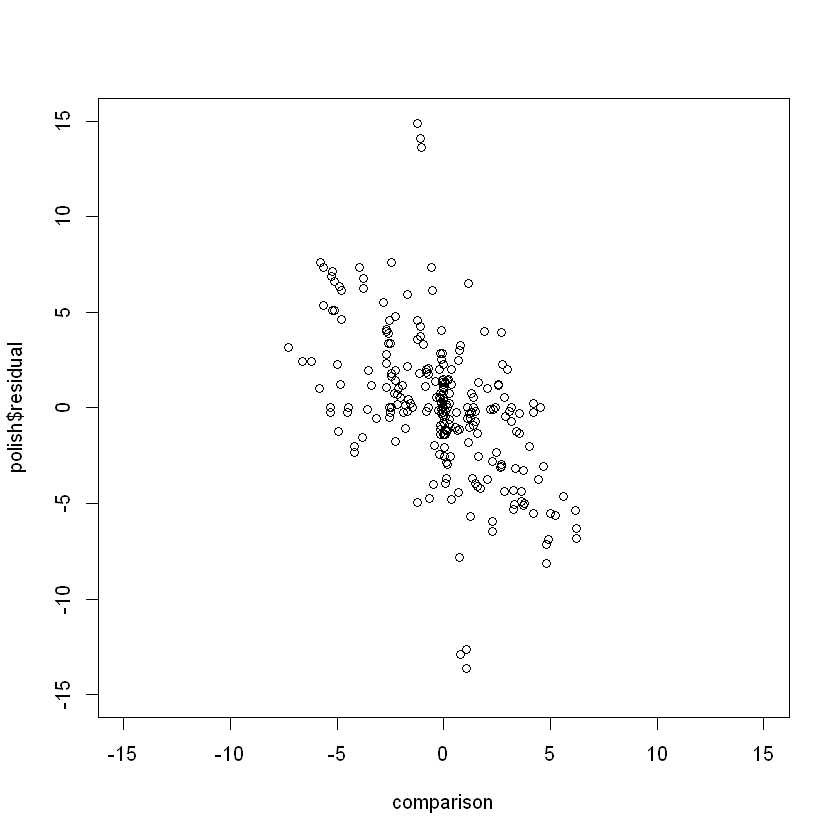

In [27]:
plot(polish$residual ~ comparison, xlim = c(-15, 15), ylim = c(-15, 15))

In [30]:
round(polish$residuals[order(polish$row),],1)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
MOSCOW,-5.4,-5.6,-4.4,0.0,5.9,7.4,7.1,5.1,1.9,-0.1,-3.1,-4.6
TORONTO,-3.8,-5.0,-3.8,-2.9,-4.9,5.5,6.8,6.2,4.6,2.0,4.0,-2.0
GENEVA,-0.7,-2.9,-0.2,0.2,1.1,0.6,2.8,2.3,0.1,-0.9,-0.9,-0.4
LONDON,2.0,1.2,0.0,-1.1,-0.2,-0.2,0.0,-0.5,-0.2,0.2,0.8,2.2
FRAKFURT,-3.1,-2.8,-0.6,1.3,1.8,2.2,1.9,1.4,0.2,-0.3,-1.8,-2.3
PARIS,1.2,-0.1,-0.3,-0.4,0.0,0.4,0.7,0.2,0.0,-0.1,-0.6,-0.1
NEW_YORK,-3.9,-5.7,-4.4,-2.6,1.4,3.3,4.6,3.6,1.9,1.3,-1.2,-3.7
MADRID,-0.2,0.0,-0.2,-0.9,0.6,2.0,4.2,3.8,2.1,0.0,-1.0,-1.0
SAN_FRANCISCO,3.2,2.5,1.2,-1.4,-2.4,-4.0,-4.8,-4.8,-1.9,1.5,2.0,3.0
TOKYO,-2.9,-3.7,-3.9,-2.1,0.4,0.3,2.6,4.1,2.9,0.8,-0.2,-1.2


## 가구 소비지출 사례

In [34]:
house <- read.table('dataset/EDA/household.txt', header = TRUE)
house

,식료품,주거비,광열수도,가구가사,피복신발,보건의료,교육,교양오락,교통통신,기타소비
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1993,301675,45588,44341,51479,75672,50533,95654,51904,103564,200544
1994,341574,47389,45995,55698,85239,54408,106110,58551,129972,215496
1995,367080,48301,52271,59117,97474,59373,127027,66848,142972,245429
1996,409502,54037,60177,62996,104896,65592,149334,75746,167487,277086
1997,427458,54038,67972,63376,97824,66640,162403,77057,188192,284584
1998,365859,49785,74272,53147,69750,58652,151439,58589,183911,250820
1999,412056,54190,76172,55533,80223,67098,164242,71850,225085,272430
2000,447018,57026,86762,59539,91785,70606,182370,84481,261442,291272
2001,463582,68246,92527,70408,98140,74300,199407,86650,286626,322237


In [36]:
house_mp <- medpolish(house)
house_mp

1: 2361220
2: 2199938
Final: 2191052



Median Polish Results (Dataset: "house")

Overall: 79769.58

Row Effects:
      1993       1994       1995       1996       1997       1998       1999 
-24674.047 -20523.547 -13960.984  -2377.453   1800.141 -14832.141  -1800.141 
      2000       2001       2002       2003       2004 
 11146.484  17513.016  18713.297  22243.016  26432.516 

Column Effects:
    식료품     주거비   광열수도   가구가사   피복신발   보건의료       교육 
339987.422 -25655.578  -7941.344 -20315.078   4830.484 -11754.109  86387.062 
  교양오락   교통통신   기타소비 
 -6233.938 133044.562 200024.906 

Residuals:
       식료품   주거비 광열수도 가구가사  피복신발   보건의료     교육 교양오락
1993 -93408.0  16148.0 -2813.19  16698.5 15745.984   7191.578 -45828.6  3042.41
1994 -57659.5  13798.5 -5309.69  16767.0 21162.484   6916.078 -39523.1  5538.91
1995 -38716.0   8148.0 -5596.25  13623.5 26834.922   5318.516 -25168.7  7273.34
1996  -7877.5   2300.5 -9273.78   5919.0 22673.391    -46.016 -14445.2  4587.81
1997   5900.9  -1876.1 -5656.38   2121.4 11423.797  -3175.609  -5553

In [40]:
house_mp$residual

,식료품,주거비,광열수도,가구가사,피복신발,보건의료,교육,교양오락,교통통신,기타소비
1993,-93407.953,16148.047,-2813.188,16698.547,15745.98438,7191.57812,-45828.594,3042.406,-84576.09,-54576.4375
1994,-57659.453,13798.547,-5309.688,16767.047,21162.48438,6916.07812,-39523.094,5538.906,-62318.59,-43774.9375
1995,-38716.016,8147.984,-5596.250,13623.484,26834.92188,5318.51562,-25168.656,7273.344,-55881.16,-20404.5000
1996,-7877.547,2300.453,-9273.781,5918.953,22673.39062,-46.01562,-14445.188,4587.812,-42949.69,-331.0312
1997,5900.859,-1876.141,-5656.375,2121.359,11423.79688,-3175.60938,-5553.781,1721.219,-26422.28,2989.3750
1998,-39065.859,10503.141,17275.906,8524.641,-17.92188,5468.67188,114.500,-114.500,-14071.00,-14142.3438
1999,-5900.859,1876.141,6143.906,-2121.359,-2576.92188,882.67188,-114.500,114.500,14071.00,-5564.3438
2000,16114.516,-8234.484,3787.281,-11061.984,-3961.54688,-8555.95312,5066.875,-201.125,37481.38,331.0312
2001,26311.984,-3381.016,3185.750,-6559.516,-3973.07812,-11228.48438,15737.344,-4398.656,56298.84,24929.5000
2002,42578.703,-10433.297,2696.469,-6743.797,-1333.35938,-5671.76562,21163.062,-5543.938,77760.56,43137.2188


In [41]:
matrix(house_mp$row, ncol = 1) %*% matrix(house_mp$col, nrow = 1) / house_mp$overall

-105163.720,7935.6937,2456.3887,6283.7889,-1494.1485,3635.7400,-26720.944,1928.2597,-41152.879,-61871.004
-87473.796,6600.8054,2043.1917,5226.7728,-1242.8130,3024.1606,-22226.129,1603.9010,-34230.422,-51463.486
-59503.375,4490.1469,1389.8654,3555.4718,-845.4140,2057.1619,-15119.153,1091.0413,-23284.980,-35007.639
-10132.988,764.6390,236.6839,605.4707,-143.9678,350.3196,-2574.681,185.7963,-3965.261,-5961.544
7672.413,-578.9632,-179.2104,-458.4454,109.0084,-265.2521,1949.476,-140.6797,3002.384,4513.913
-63216.346,4770.3291,1476.5921,3777.3309,-898.1673,2185.5275,-16062.578,1159.1216,-24737.948,-37192.093
-7672.413,578.9632,179.2104,458.4454,-109.0084,265.2521,-1949.476,140.6797,-3002.384,-4513.913
47507.641,-3584.9444,-1109.6720,-2838.6975,674.9806,-1642.4431,12071.169,-871.0901,18590.786,27950.185
74642.554,-5632.5551,-1743.4827,-4460.0747,1060.5089,-2580.5565,18965.852,-1368.6301,29209.274,43914.477
79758.295,-6018.5908,-1862.9749,-4765.7528,1133.1925,-2757.4188,20265.705,-1462.4312,31211.177,46924.223
94802.376,-7153.8228,-2214.3709,-5664.6733,1346.9363,-3277.5257,24088.240,-1738.2763,37098.257,55775.112


In [43]:
comparison <- matrix(house_mp$row, ncol = 1) %*% matrix(house_mp$col, nrow = 1) / house_mp$overall

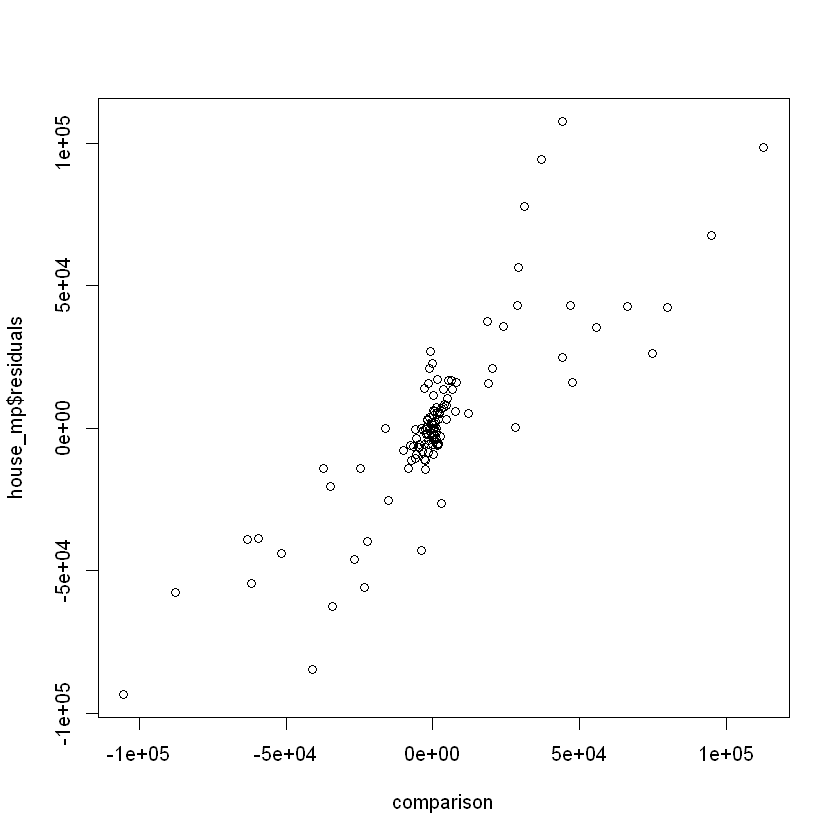

In [45]:
plot(house_mp$residuals ~ comparison)

가법적이지 않다. (그렇다고 승법적인 것은 아니다.)

이제 어떻게 할 것인가? 로그 변환을 취한 뒤 다시 살펴보자

In [49]:
house_log_mp <- medpolish(log(house))
house_log_mp

1: 10.10955
2: 8.252357
Final: 8.19259



Median Polish Results (Dataset: "log(house)")

Overall: 11.30465

Row Effects:
       1993        1994        1995        1996        1997        1998 
-0.32175936 -0.22877213 -0.12265758 -0.01029705  0.01029705 -0.13095072 
       1999        2000        2001        2002        2003        2004 
-0.01268085  0.06165227  0.14900604  0.17342852  0.21261832  0.26830487 

Column Effects:
     식료품      주거비    광열수도    가구가사    피복신발    보건의료 
 1.63469862 -0.39685225 -0.07144553 -0.29124378  0.06146341 -0.18422407 
       교육    교양오락    교통통신    기타소비 
 0.73231337 -0.08222035  0.99039062  1.22733896 

Residuals:
          식료품      주거비   광열수도    가구가사    피복신발  보건의료
1993 -0.00047918  1.4137e-01 -0.2117756  0.15728690  0.18981396  0.031720
1994  0.03074766  8.7124e-02 -0.2681398  0.14306996  0.21587760  0.012617
1995 -0.00335143  7.1902e-05 -0.2463454  0.09652970  0.24388965 -0.006169
1996 -0.00634999 -7.1902e-05 -0.2178574  0.04772186  0.20491282 -0.018915
1997  0.01597017 -2.0647e-02 -0.1166459  0.

In [55]:
comparison <- matrix(house_log_mp$row, ncol = 1) %*% matrix(house_log_mp$col, nrow = 1) / house_log_mp$overall

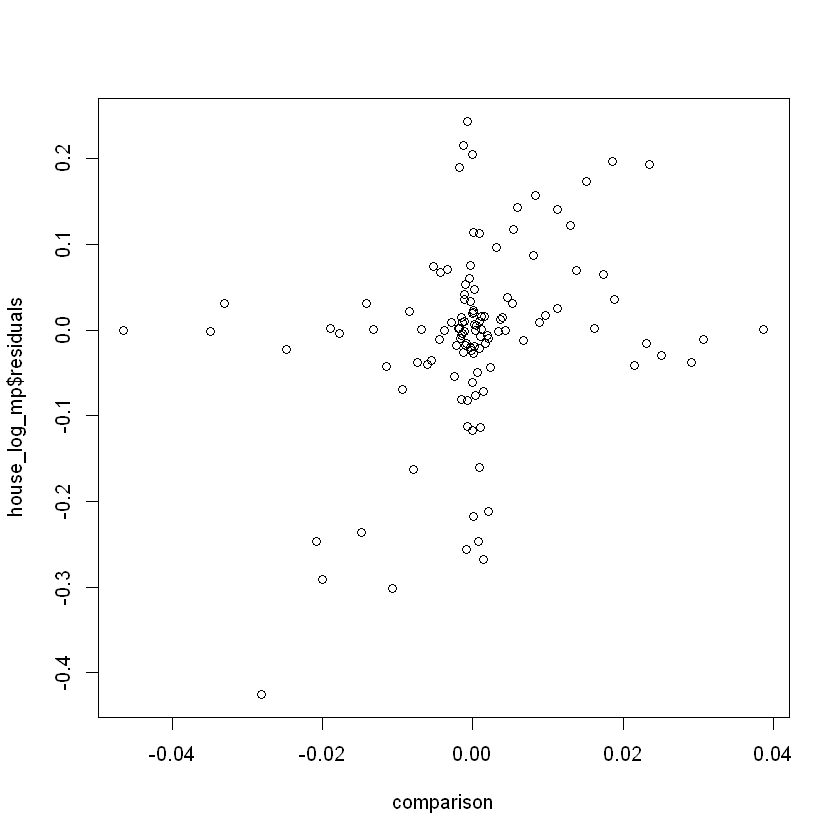

In [56]:
plot(house_log_mp$residuals ~ comparison)

이제는 경향선을 찾기 어렵다.

로그 변환 자료에 대한 중간값 다듬기 결과를 살펴보자.

In [59]:
round(house_log_mp$residuals, 2)

,식료품,주거비,광열수도,가구가사,피복신발,보건의료,교육,교양오락,교통통신,기타소비
1993,0.00,0.14,-0.21,0.16,0.19,0.03,-0.25,-0.04,-0.43,0.00
1994,0.03,0.09,-0.27,0.14,0.22,0.01,-0.24,-0.02,-0.29,-0.02
1995,0.00,0.00,-0.25,0.10,0.24,-0.01,-0.16,0.01,-0.30,0.00
1996,-0.01,0.00,-0.22,0.05,0.20,-0.02,-0.11,0.02,-0.26,0.01
1997,0.02,-0.02,-0.12,0.03,0.11,-0.02,-0.05,0.02,-0.16,0.02
1998,0.00,0.04,0.11,0.00,-0.08,-0.01,0.02,-0.11,-0.04,0.03
1999,0.00,0.01,0.02,-0.08,-0.06,0.01,-0.02,-0.03,0.04,0.00
2000,0.01,-0.02,0.08,-0.08,0.00,-0.02,0.02,0.06,0.12,-0.01
2001,-0.04,0.07,0.05,0.00,-0.02,-0.05,0.02,0.00,0.12,0.00
2002,-0.03,-0.04,0.04,-0.01,-0.01,0.01,0.03,-0.03,0.17,0.04


In [61]:
house_log_mp


Median Polish Results (Dataset: "log(house)")

Overall: 11.30465

Row Effects:
       1993        1994        1995        1996        1997        1998 
-0.32175936 -0.22877213 -0.12265758 -0.01029705  0.01029705 -0.13095072 
       1999        2000        2001        2002        2003        2004 
-0.01268085  0.06165227  0.14900604  0.17342852  0.21261832  0.26830487 

Column Effects:
     식료품      주거비    광열수도    가구가사    피복신발    보건의료 
 1.63469862 -0.39685225 -0.07144553 -0.29124378  0.06146341 -0.18422407 
       교육    교양오락    교통통신    기타소비 
 0.73231337 -0.08222035  0.99039062  1.22733896 

Residuals:
          식료품      주거비   광열수도    가구가사    피복신발  보건의료
1993 -0.00047918  1.4137e-01 -0.2117756  0.15728690  0.18981396  0.031720
1994  0.03074766  8.7124e-02 -0.2681398  0.14306996  0.21587760  0.012617
1995 -0.00335143  7.1902e-05 -0.2463454  0.09652970  0.24388965 -0.006169
1996 -0.00634999 -7.1902e-05 -0.2178574  0.04772186  0.20491282 -0.018915
1997  0.01597017 -2.0647e-02 -0.1166459  0.

## 2원 빈도 표 분석

In [134]:
UCBAdmissions

, , Dept = A

          Gender
Admit      Male Female
  Admitted  512     89
  Rejected  313     19

, , Dept = B

          Gender
Admit      Male Female
  Admitted  353     17
  Rejected  207      8

, , Dept = C

          Gender
Admit      Male Female
  Admitted  120    202
  Rejected  205    391

, , Dept = D

          Gender
Admit      Male Female
  Admitted  138    131
  Rejected  279    244

, , Dept = E

          Gender
Admit      Male Female
  Admitted   53     94
  Rejected  138    299

, , Dept = F

          Gender
Admit      Male Female
  Admitted   22     24
  Rejected  351    317


In [135]:
Tab1 <- UCBAdmissions[1,,]
Tab1

        Dept
Gender     A   B   C   D   E   F
  Male   512 353 120 138  53  22
  Female  89  17 202 131  94  24

In [136]:
Tab2 <- UCBAdmissions[2,,]
Tab2

        Dept
Gender     A   B   C   D   E   F
  Male   313 207 205 279 138 351
  Female  19   8 391 244 299 317

In [137]:
Tab <- Tab1 + Tab2
Tab

        Dept
Gender     A   B   C   D   E   F
  Male   825 560 325 417 191 373
  Female 108  25 593 375 393 341

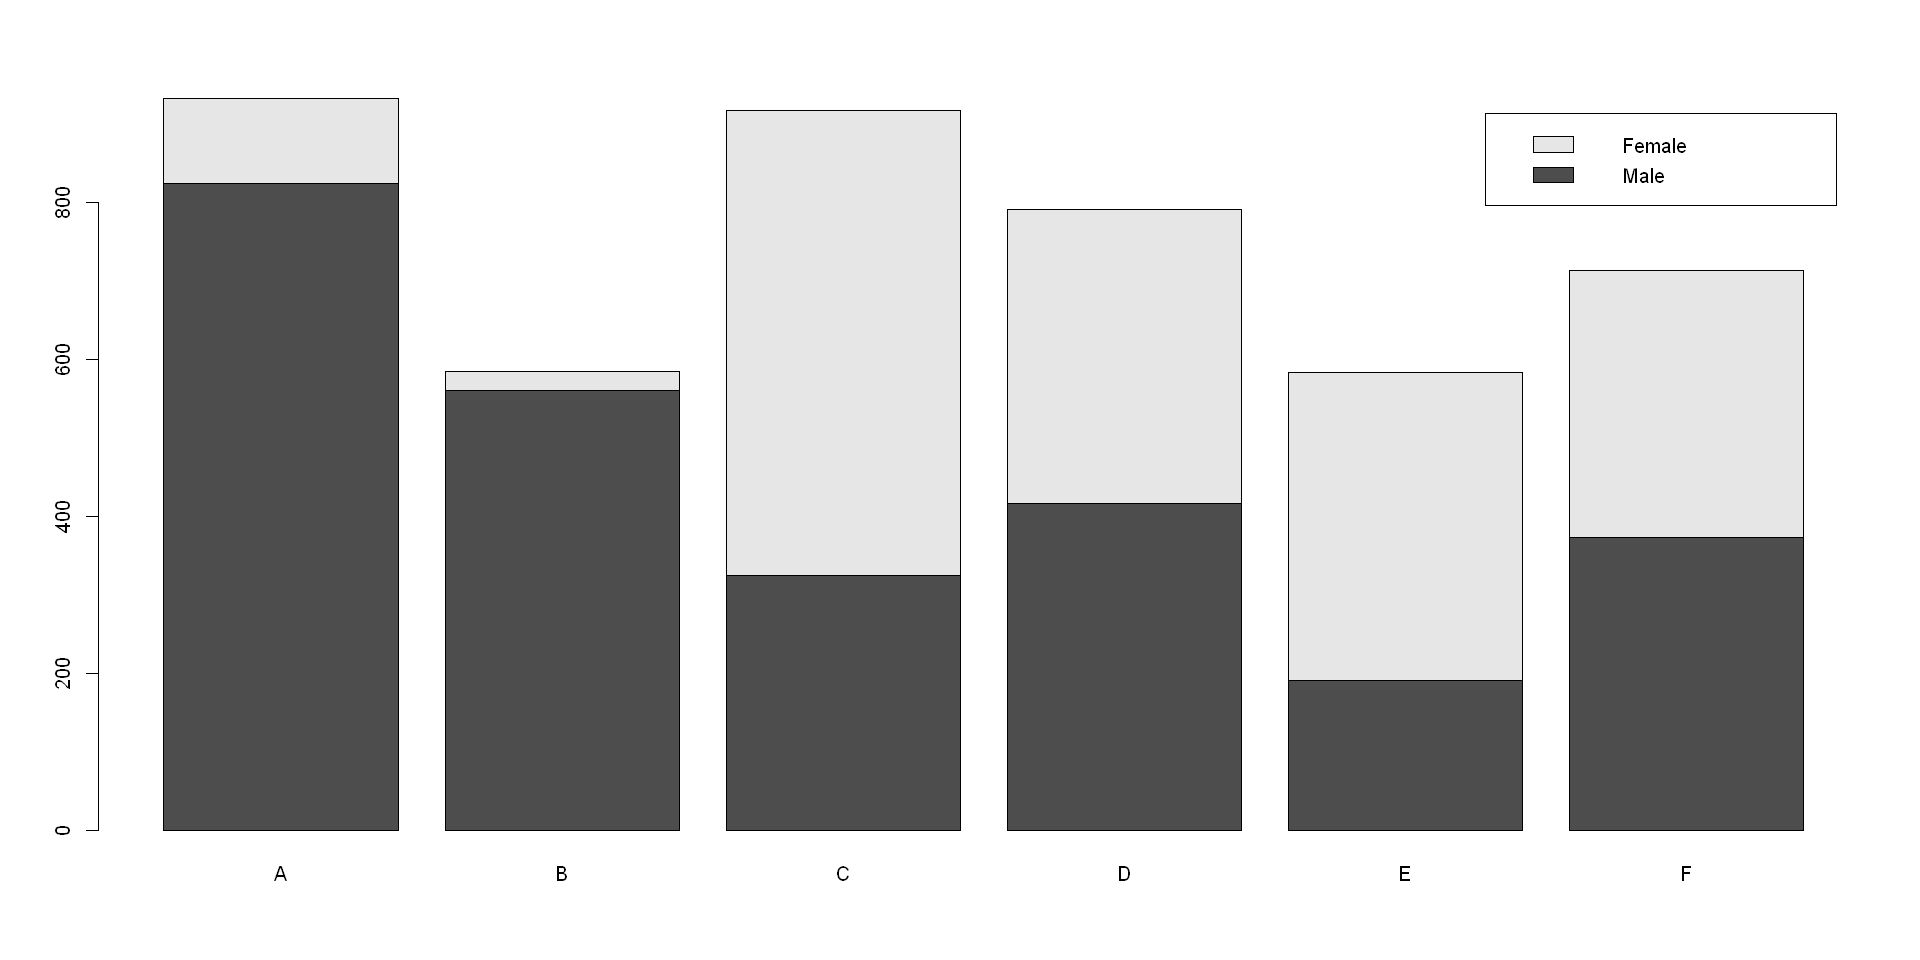

In [157]:
barplot(Tab, legend = rownames(Tab))

In [158]:
Tab_col <- apply(Tab, 2, sum)
Tab_col

A   B   C   D   E   F 
933 585 918 792 584 714

In [159]:
Tab_c <- Tab %*% diag(1/Tab_col) * 100
Tab_c

Male,88.42444,95.726496,35.40305,52.65152,32.70548,52.2409
Female,11.57556,4.273504,64.59695,47.34848,67.29452,47.7591


In [160]:
colnames(Tab_c) <- c('A', 'B', 'C', 'D', 'E', 'F')
rownames(Tab_c) <- c('Male', 'Female')
Tab_c

,A,B,C,D,E,F
Male,88.42444,95.726496,35.40305,52.65152,32.70548,52.2409
Female,11.57556,4.273504,64.59695,47.34848,67.29452,47.7591


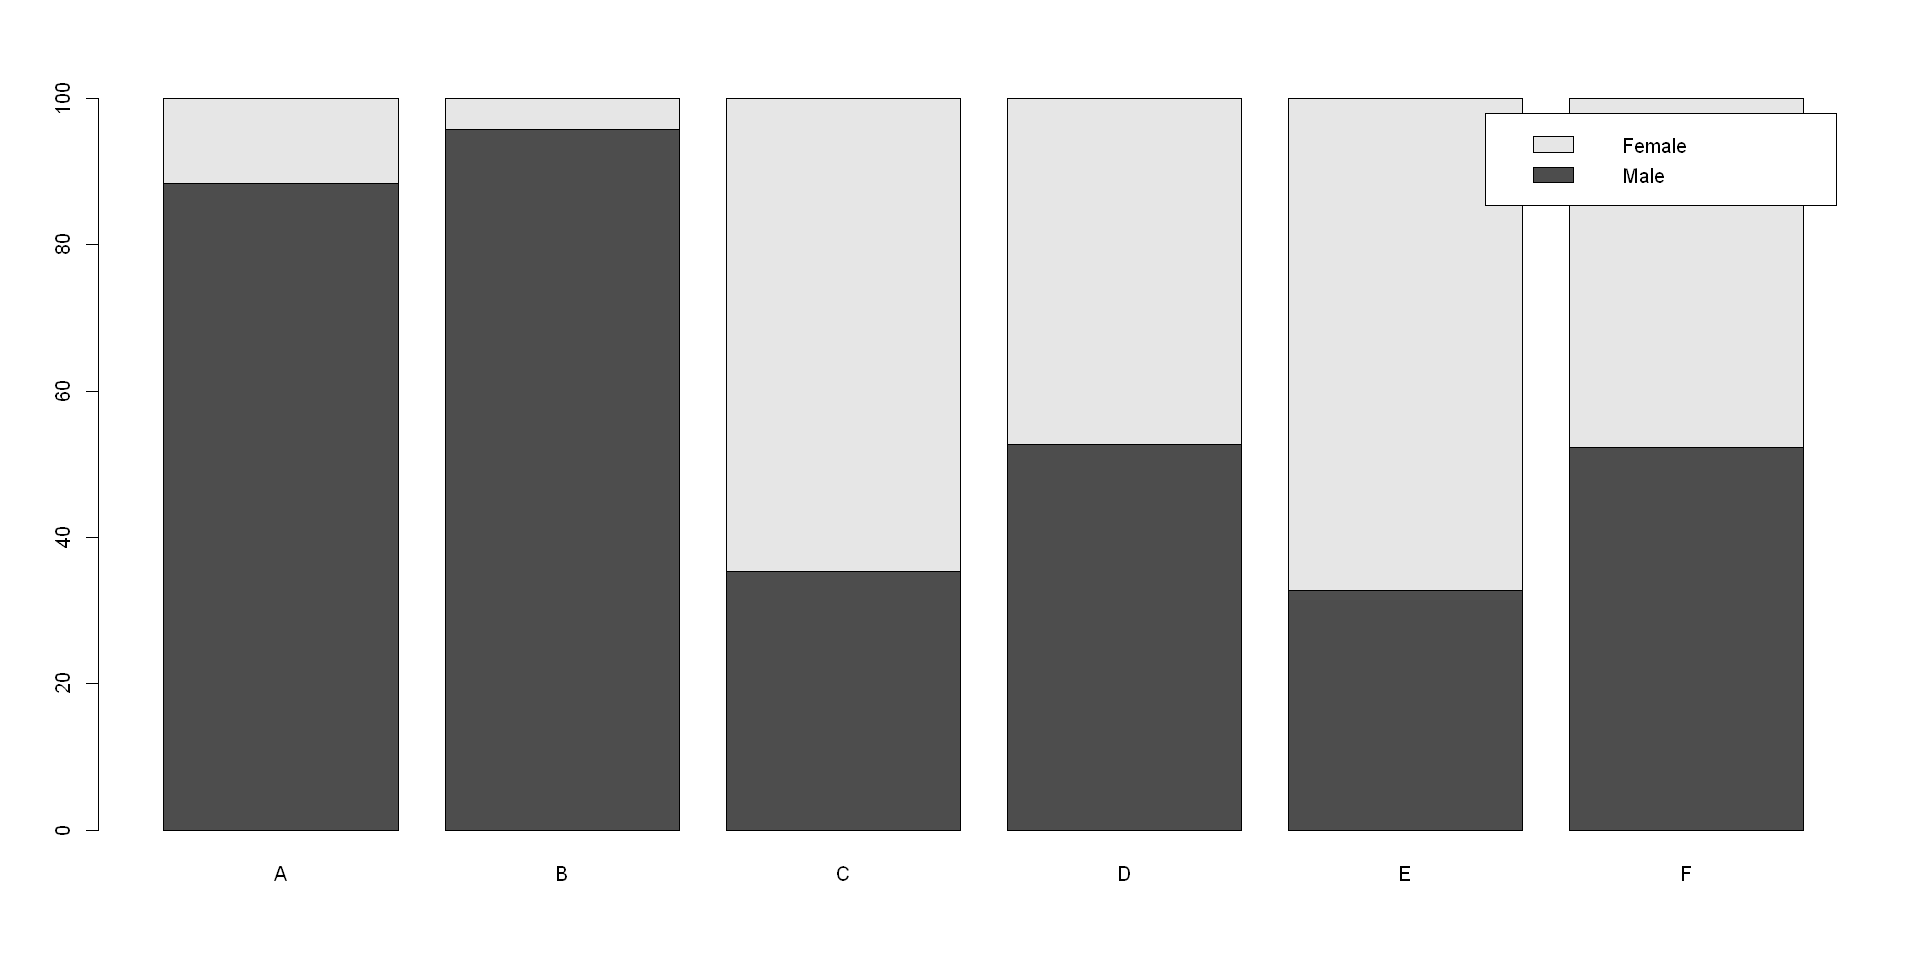

In [161]:
barplot(Tab_c, legend = rownames(Tab_c))

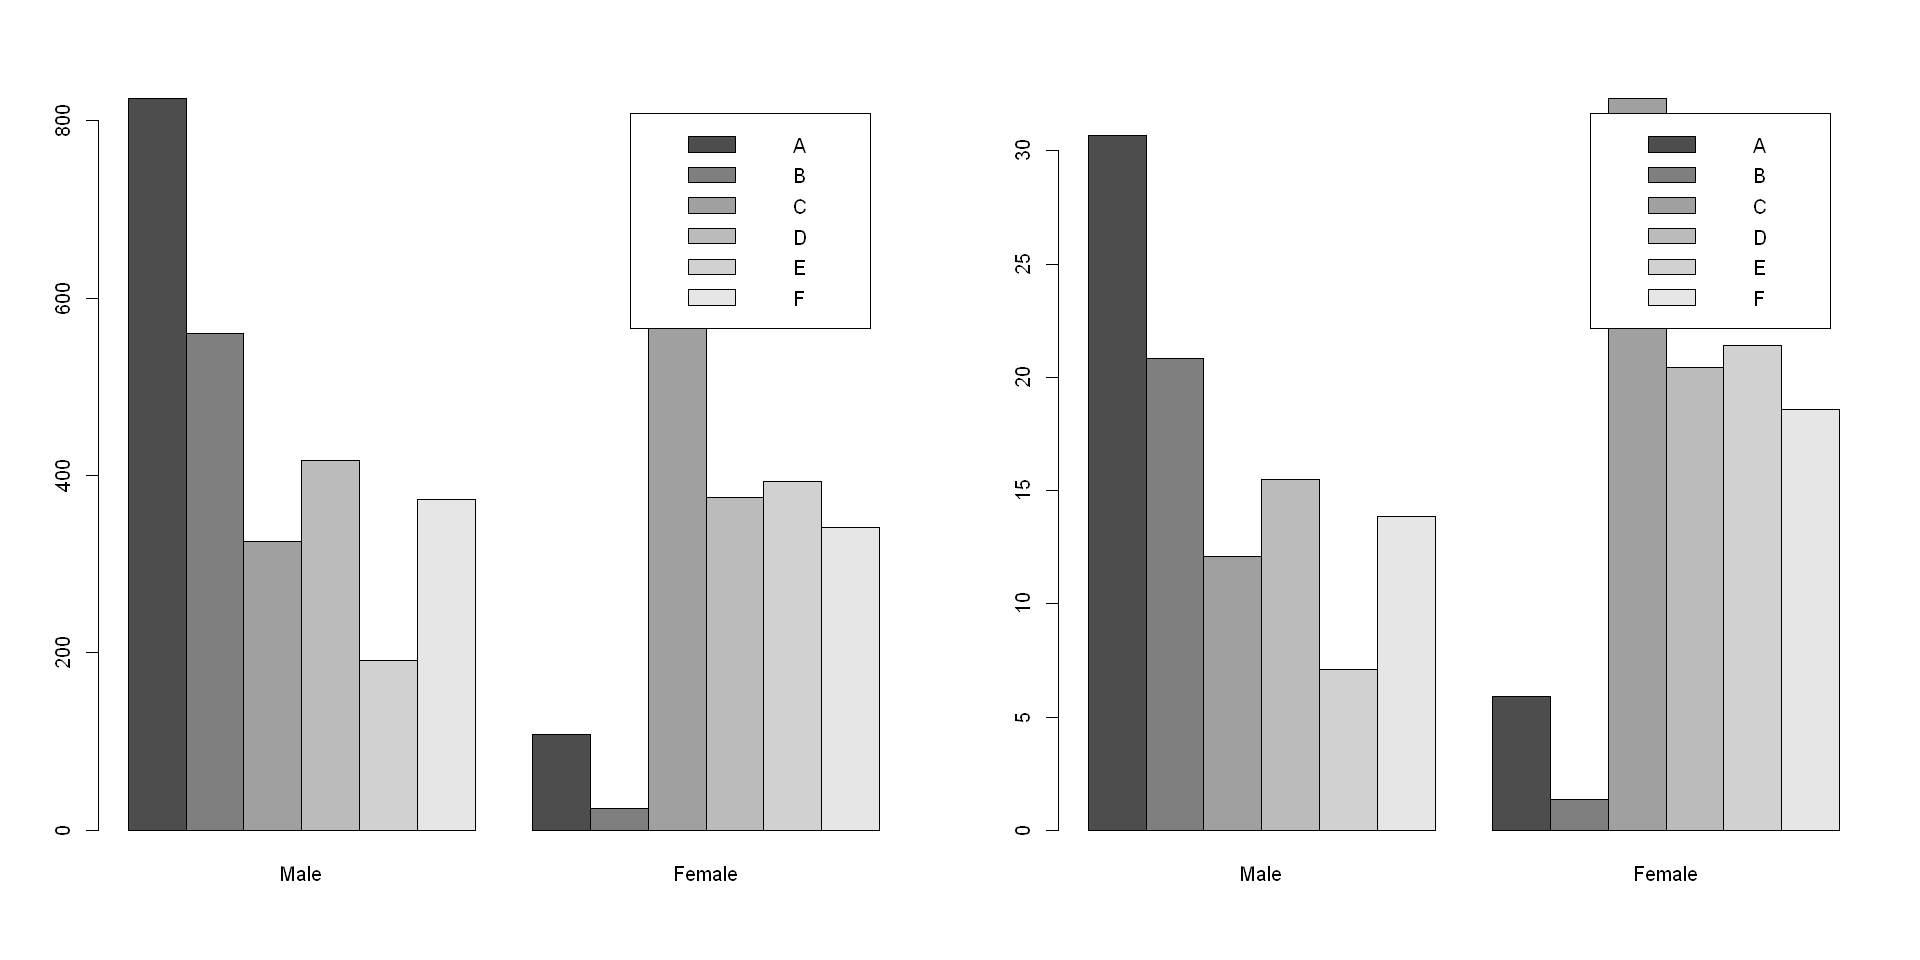

In [156]:
par(mfrow = c(1,2))
barplot(t(Tab), beside = T, legend = colnames(Tab))
Tab_row <- apply(Tab,1,sum)
Tab_r <- diag(1/Tab_row) %*% Tab * 100
colnames(Tab_r) <- colnames(Tab_c)
rownames(Tab_r) <- rownames(Tab_c)
barplot(t(Tab_r), beside = T, legend = colnames(Tab))

- 남학생은 A, B에 50% 이상 집중되어 있는 것과 달리 여학생은 C, D, E, F에 90% 이상이 집중되어 있다.

In [170]:
Tab_M <- UCBAdmissions[,1,]
addmargins(Tab_M)

,A,B,C,D,E,F,Sum
Admitted,512,353,120,138,53,22,1198
Rejected,313,207,205,279,138,351,1493
Sum,825,560,325,417,191,373,2691


In [171]:
Tab_F <- UCBAdmissions[,2,]
addmargins(Tab_F)

,A,B,C,D,E,F,Sum
Admitted,89,17,202,131,94,24,557
Rejected,19,8,391,244,299,317,1278
Sum,108,25,593,375,393,341,1835


이제 남학생의 합격률과 여성의 합격률을 비교해보자.

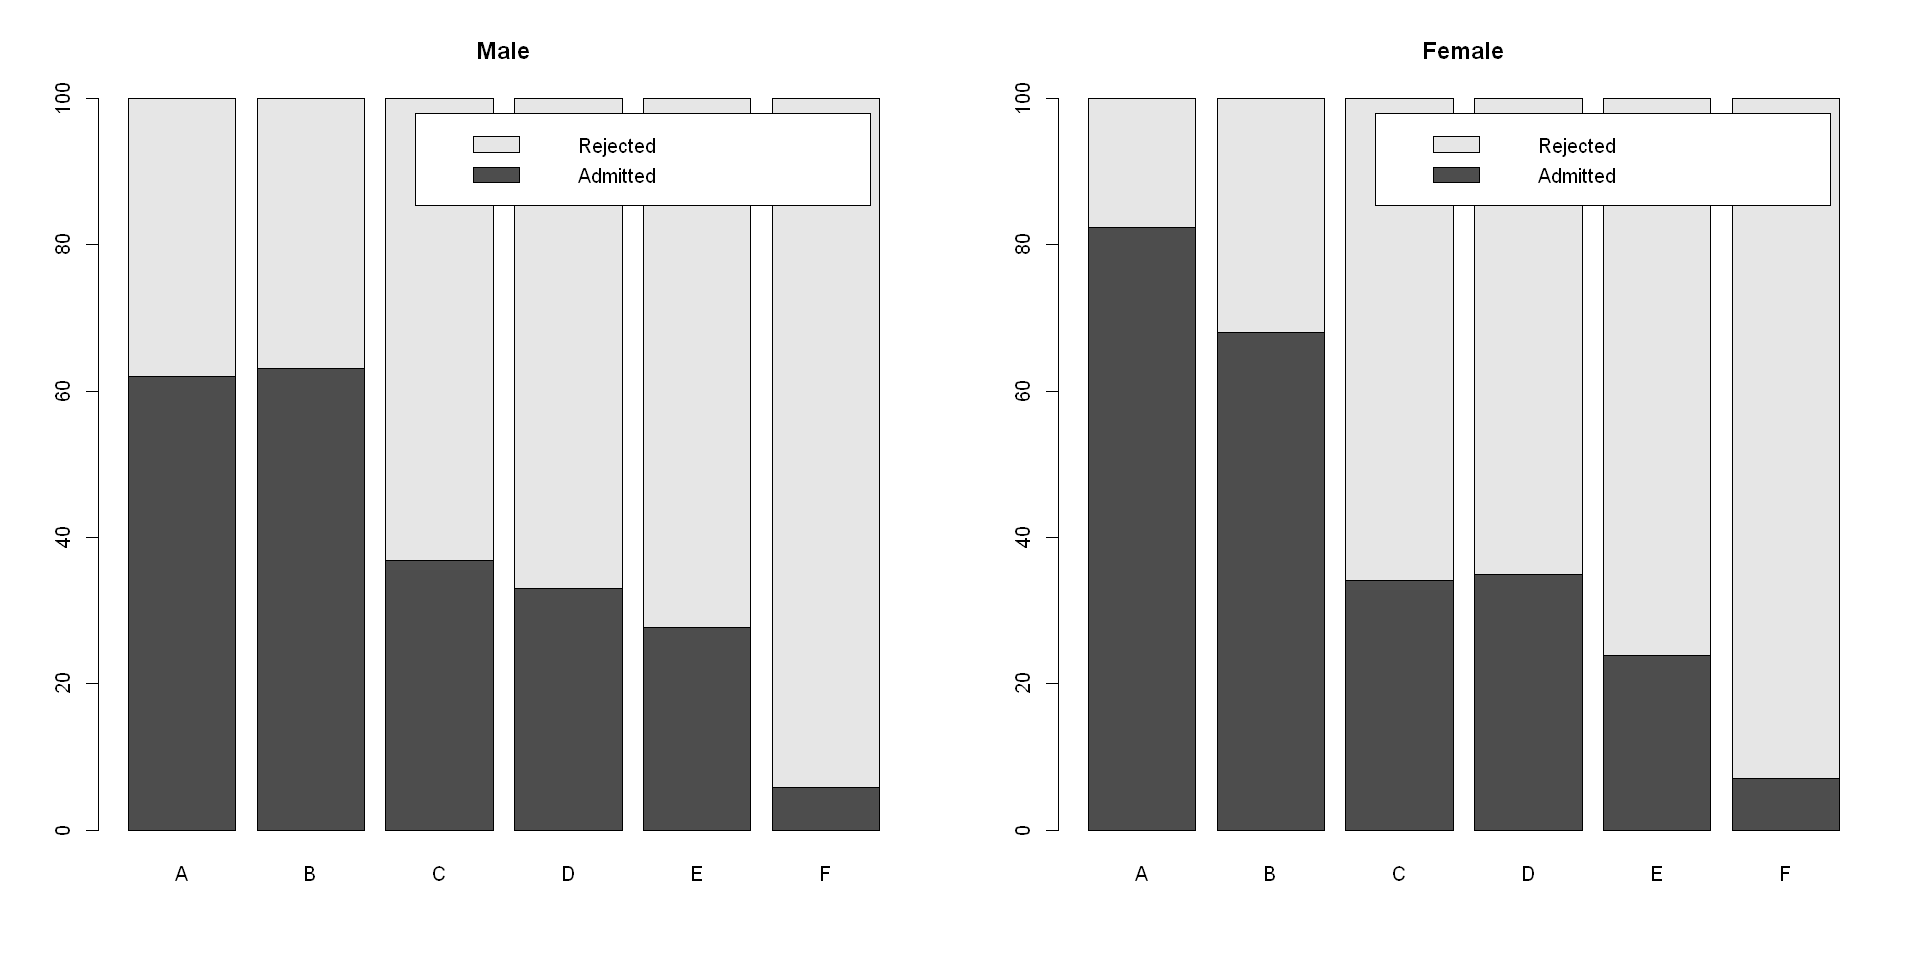

In [179]:
par(mfrow = c(1,2))
Tab_M_col <- apply(Tab_M, 2, sum)
Tab_M_C <- Tab_M %*% diag(1/Tab_M_col) * 100
colnames(Tab_M_C) <- c('A', 'B', 'C', 'D', 'E', 'F')
barplot(Tab_M_C, legend = rownames(Tab_M_C), main = 'Male')
Tab_F_col <- apply(Tab_F, 2, sum)
Tab_F_C <- Tab_F %*% diag(1/Tab_F_col) * 100
colnames(Tab_F_C) <- colnames(Tab_M_C)
barplot(Tab_F_C, legend = rownames(Tab_F_C), main = 'Female')

C, D, E, F 학과에서 남학생과 여학생의 합격률은 비슷하고

A, B 학과에서는 여학생의 합격률이 더 높은 것으로 보인다.

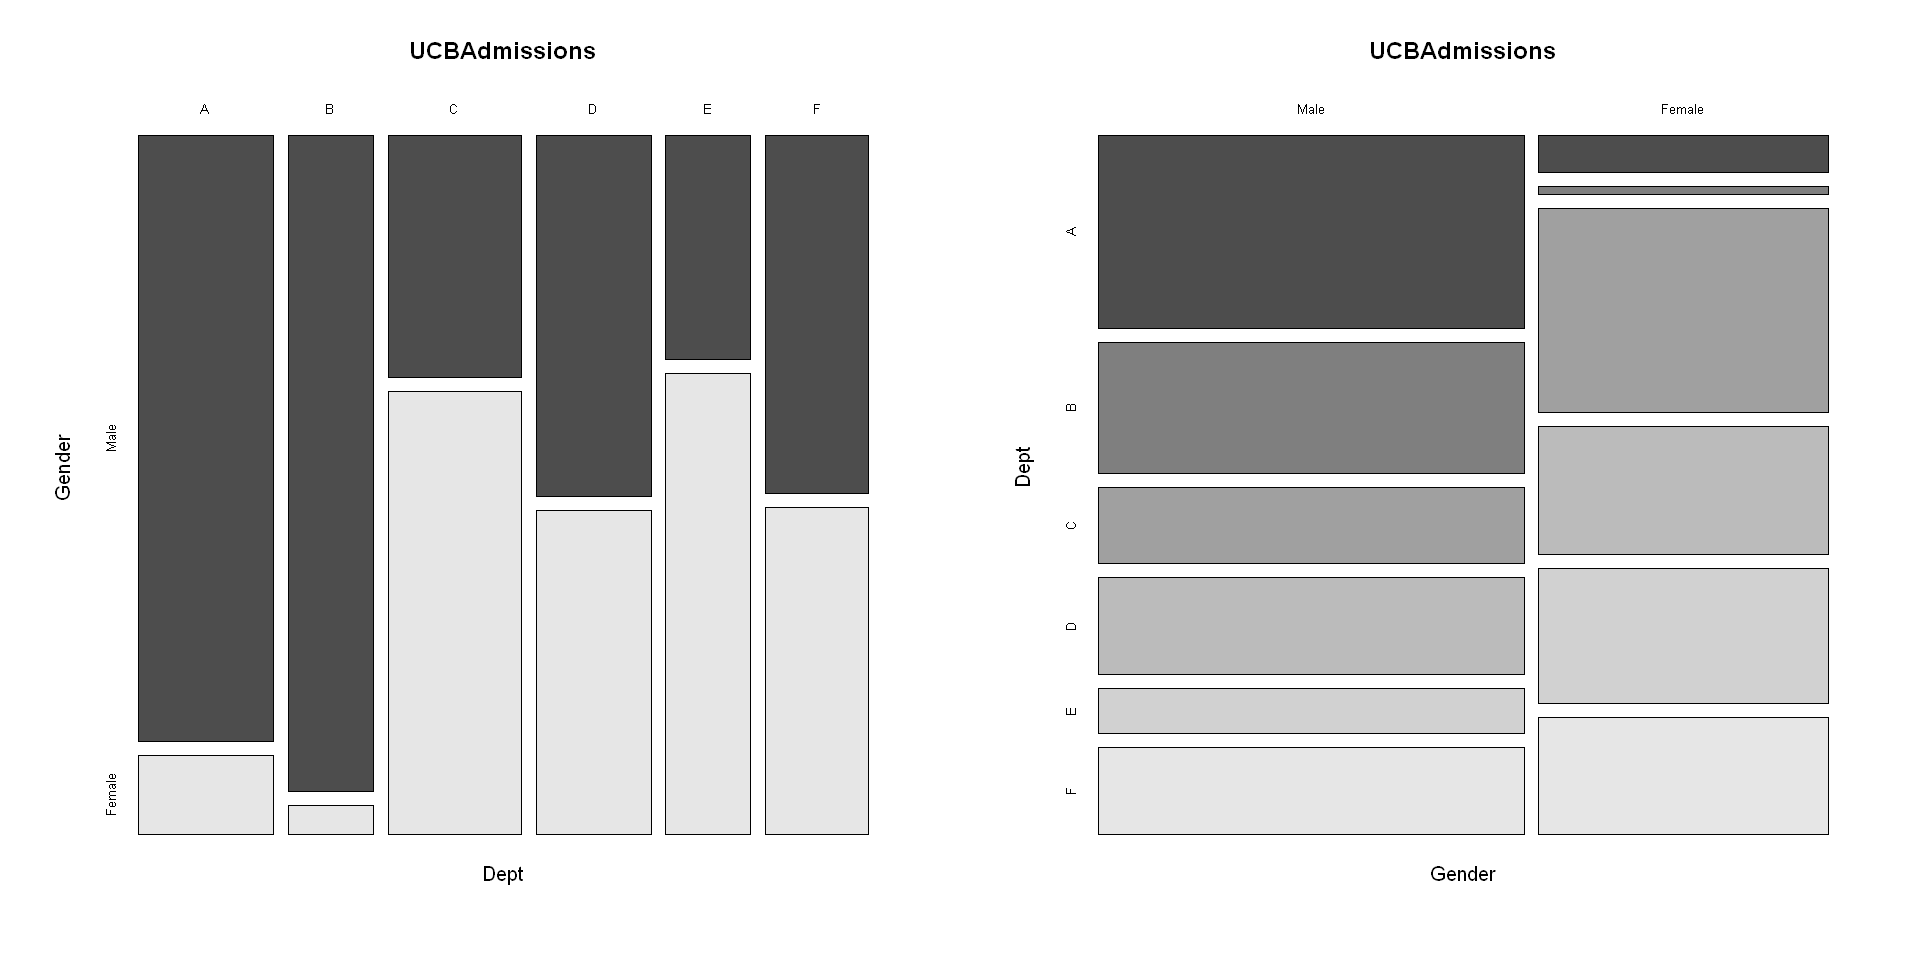

In [185]:
par(mfrow = c(1,2))
mosaicplot(~Dept+Gender, data = UCBAdmissions, color = T)
mosaicplot(~Gender+Dept, data = UCBAdmissions, color = T)

# Ch.8 시계열 자료의 탐색

## 시계열 평활이란?

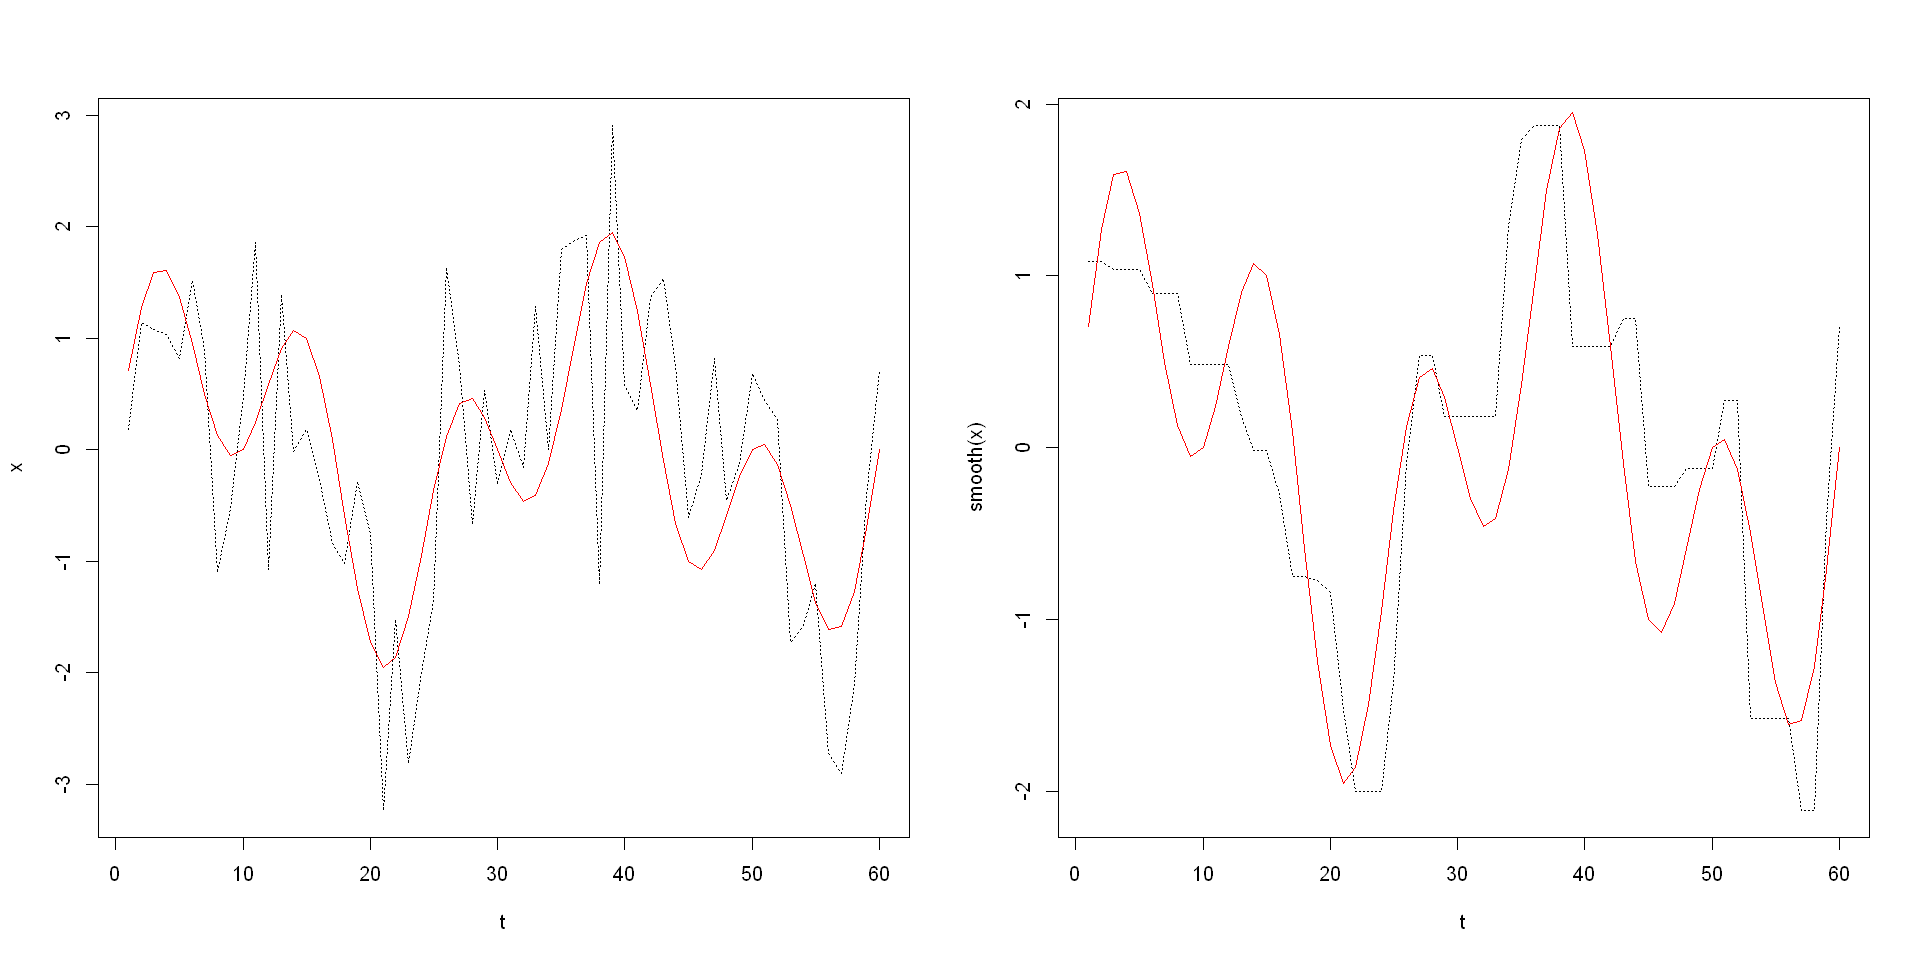

In [201]:
par(mfrow = c(1,2))
t <- seq(1:60)
s <- sin(2*pi*t/12) + sin(2*pi*t/30)
a <- rnorm(60, 0, 1)
x <- s+a
plot(t, x, type = 'l', lty = 'dotted')
lines(t, s, col = 'red')
plot(t, smooth(x), type = 'l', lty = 'dotted')
lines(t, s, col = 'red')

## 평활방법

이동평균(이동중앙값)에서 $K$가 작으면 $smooth_t$ 계열이 평탄하게 된다. 반대로 $K$를 작게하면 $smooth_t$ 계열에 잦은 변동이 생긴다.

이동평균은 특이점에 취약하므로 평균을 중간값으로 대치한 이동중간값이 선호된다.

In [207]:
t <- 1:12
x <- c(2.1, 9.8, 19.5, 22.5, 16.6, 16.1, 18.5, -3.4, 8.9, -25.2, -14.0, -0.4)

In [211]:
runmed(x, k=3)

[1]   2.1   9.8  19.5  19.5  16.6  16.6  16.1   8.9  -3.4 -14.0 -14.0 -14.0
attr(,"k")
[1] 3

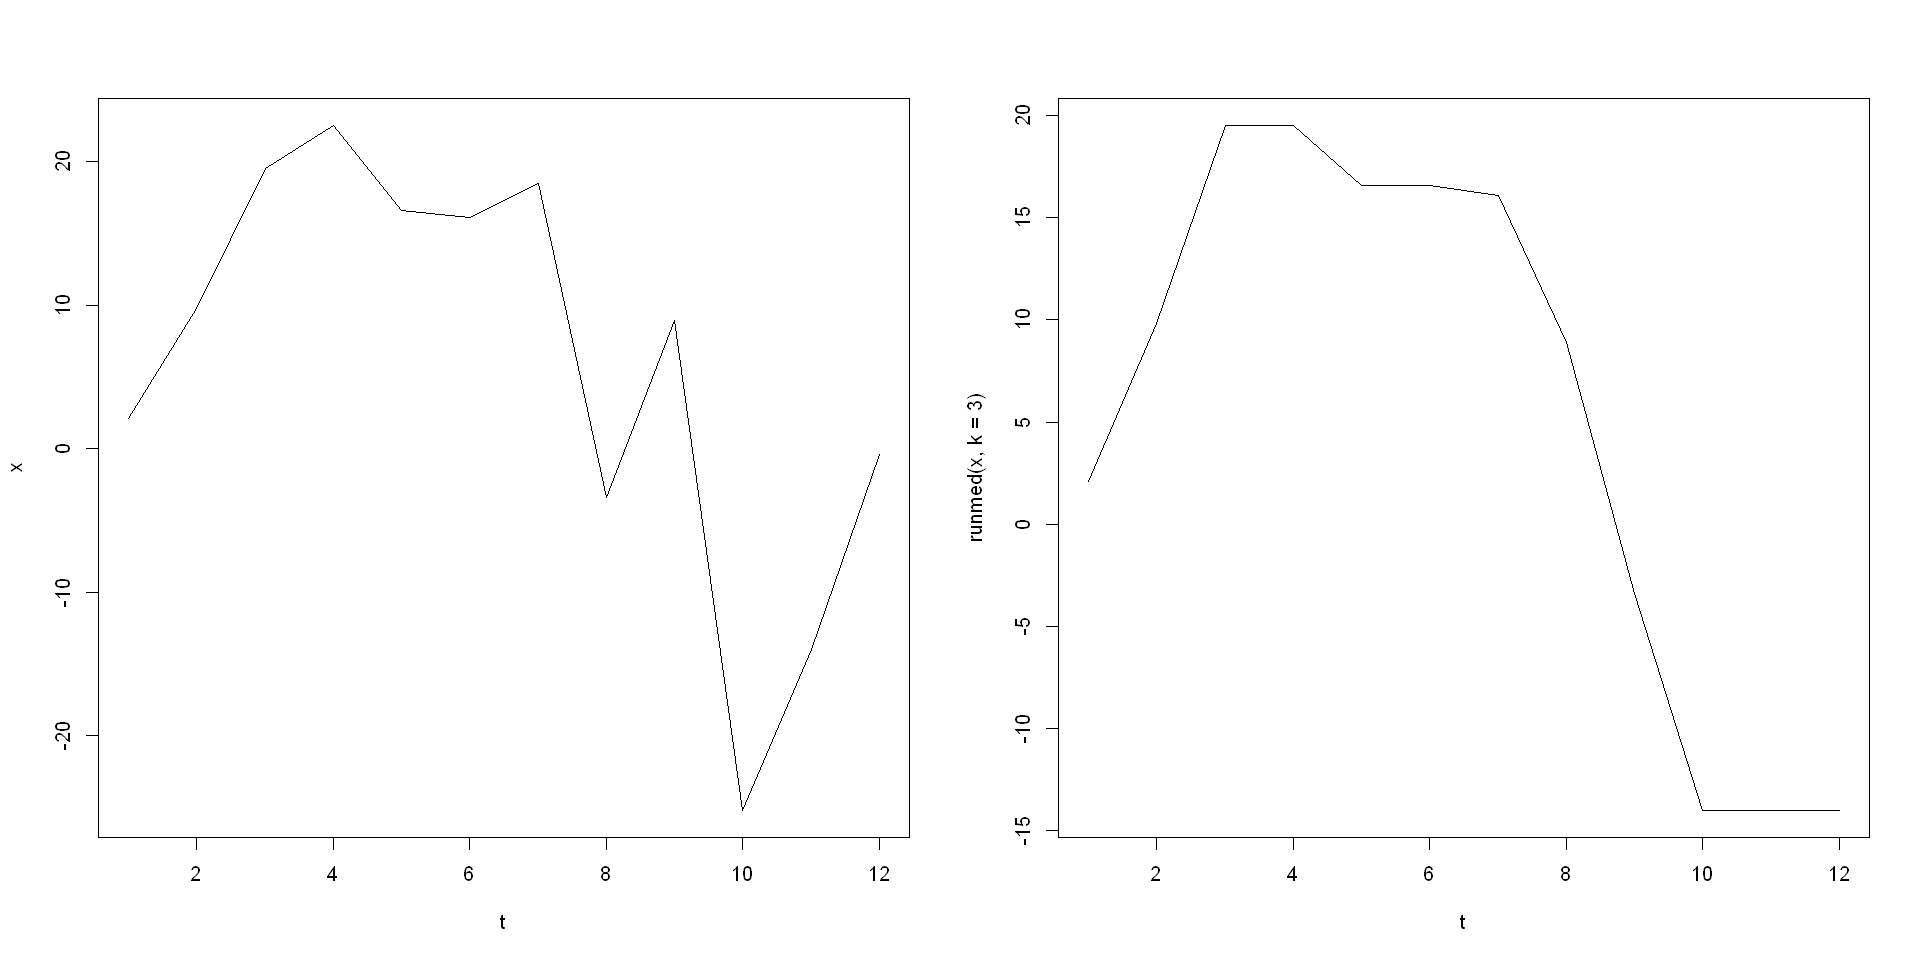

In [212]:
par(mfrow = c(1,2))
plot(t, x, type = 'l')
plot(t, runmed(x, k = 3), type = 'l')

In [220]:
smooth(x, kind = c("3RSS"), twiceit = T)

3RSS Tukey smoother resulting from  smooth(x = x, kind = c("3RSS"), twiceit = T) 
 __twiced__  used 5 iterations
 [1]   2.1   9.8  19.5  16.6  16.6  16.6  16.1   8.9  -3.4 -14.0 -14.0 -14.0

## 사례분석

In [223]:
Telemetric <- read.table("dataset/EDA/Telemetric.txt", header = T)
head(Telemetric)

,day,temperature
,<int>,<int>
1,1,60
2,2,70
3,3,54
4,4,56
5,5,70
6,6,66


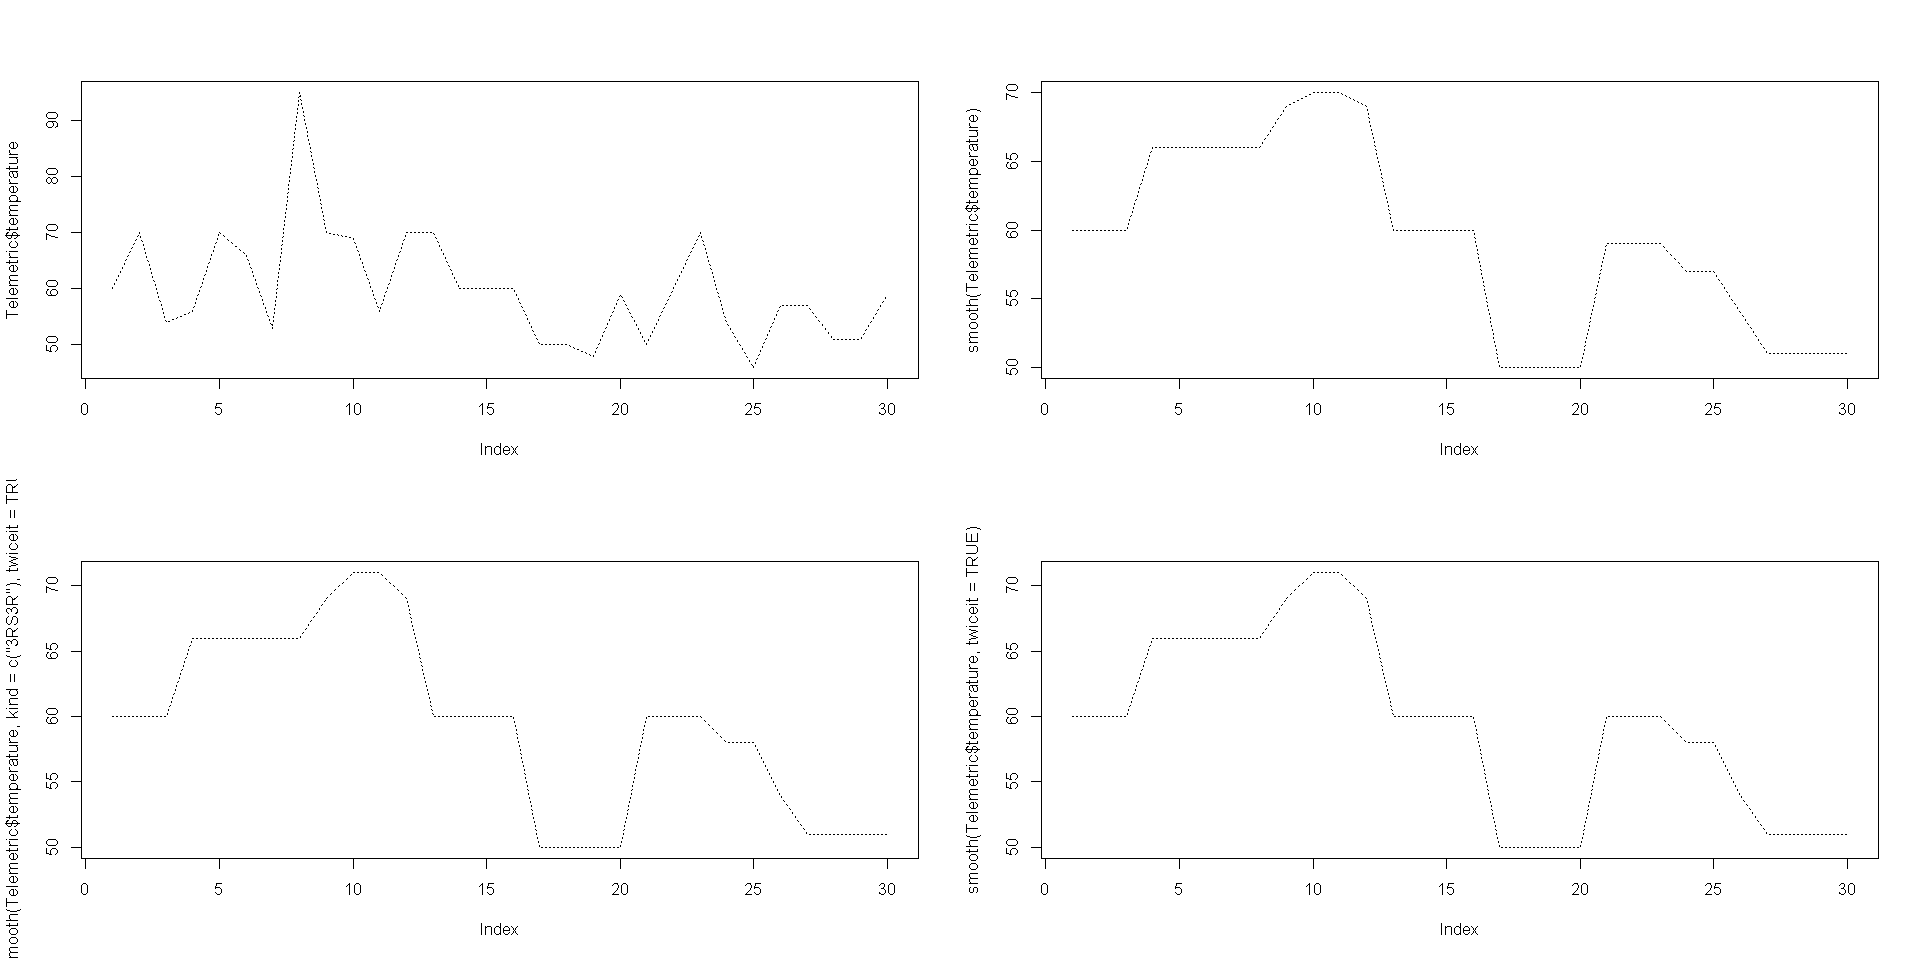

In [234]:
par(mfrow = c(2,2))
plot(Telemetric$temperature, type = 'l', lty = 'dotted')
plot(smooth(Telemetric$temperature), type = 'l', lty = 'dotted')
plot(smooth(Telemetric$temperature, kind = c('3RS3R'), twiceit = TRUE), type = 'l', lty = 'dotted')
plot(smooth(Telemetric$temperature, twiceit = TRUE), type = 'l', lty = 'dotted')

## 계절형 시계열의 분해

In [243]:
export <- read.table('dataset/EDA/Export_1988.txt', header = TRUE)
series <- ts(export$Series/1000, start = c(1988,1), frequency = 12)

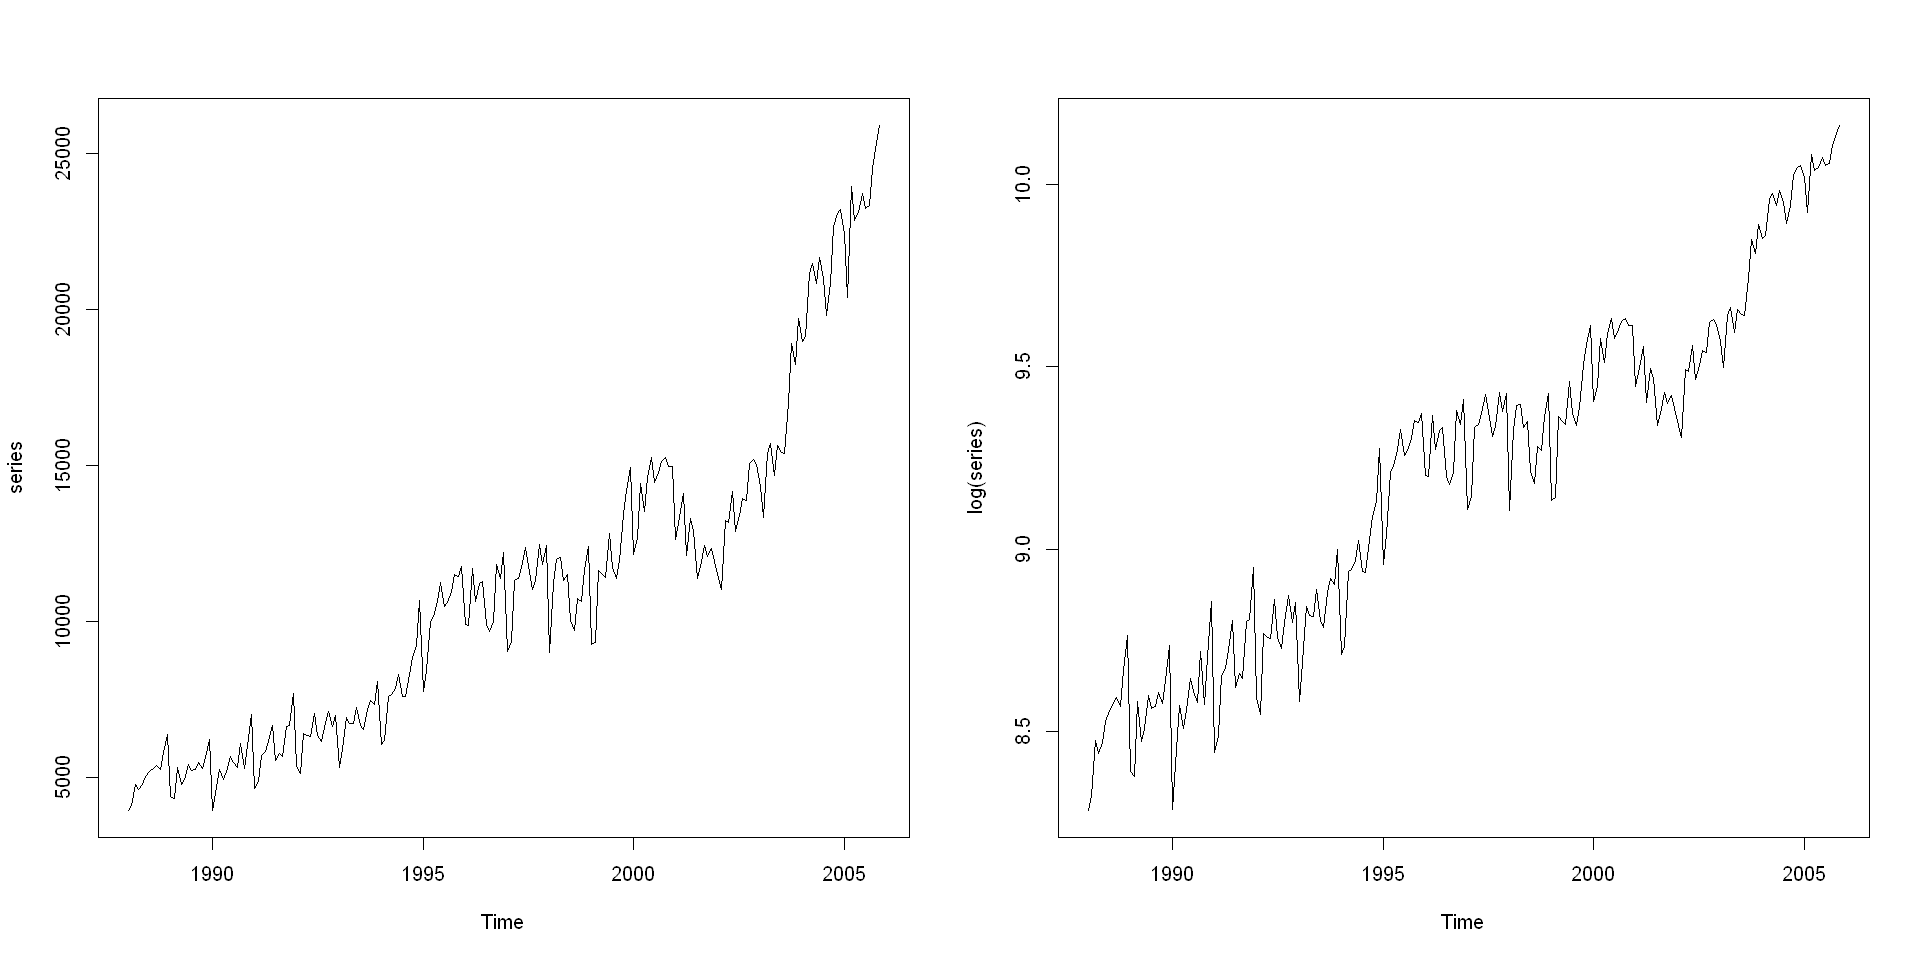

In [249]:
par(mfrow = c(1,2))
plot(series)
plot(log(series))

In [251]:
decomp_out <- decompose(log(series))

In [252]:
decomp_out$season

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1988,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1989,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1990,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1991,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1992,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1993,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1994,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1995,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1996,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315
1997,-0.138387108,-0.114503286,0.034690776,-0.001900557,0.012587202,0.054760266,-0.024138058,-0.039345242,0.005798168,0.045167687,0.054642837,0.110627315


In [254]:
round(decomp_out$season[1:12], 4)

[1] -0.1384 -0.1145  0.0347 -0.0019  0.0126  0.0548 -0.0241 -0.0393  0.0058
[10]  0.0452  0.0546  0.1106

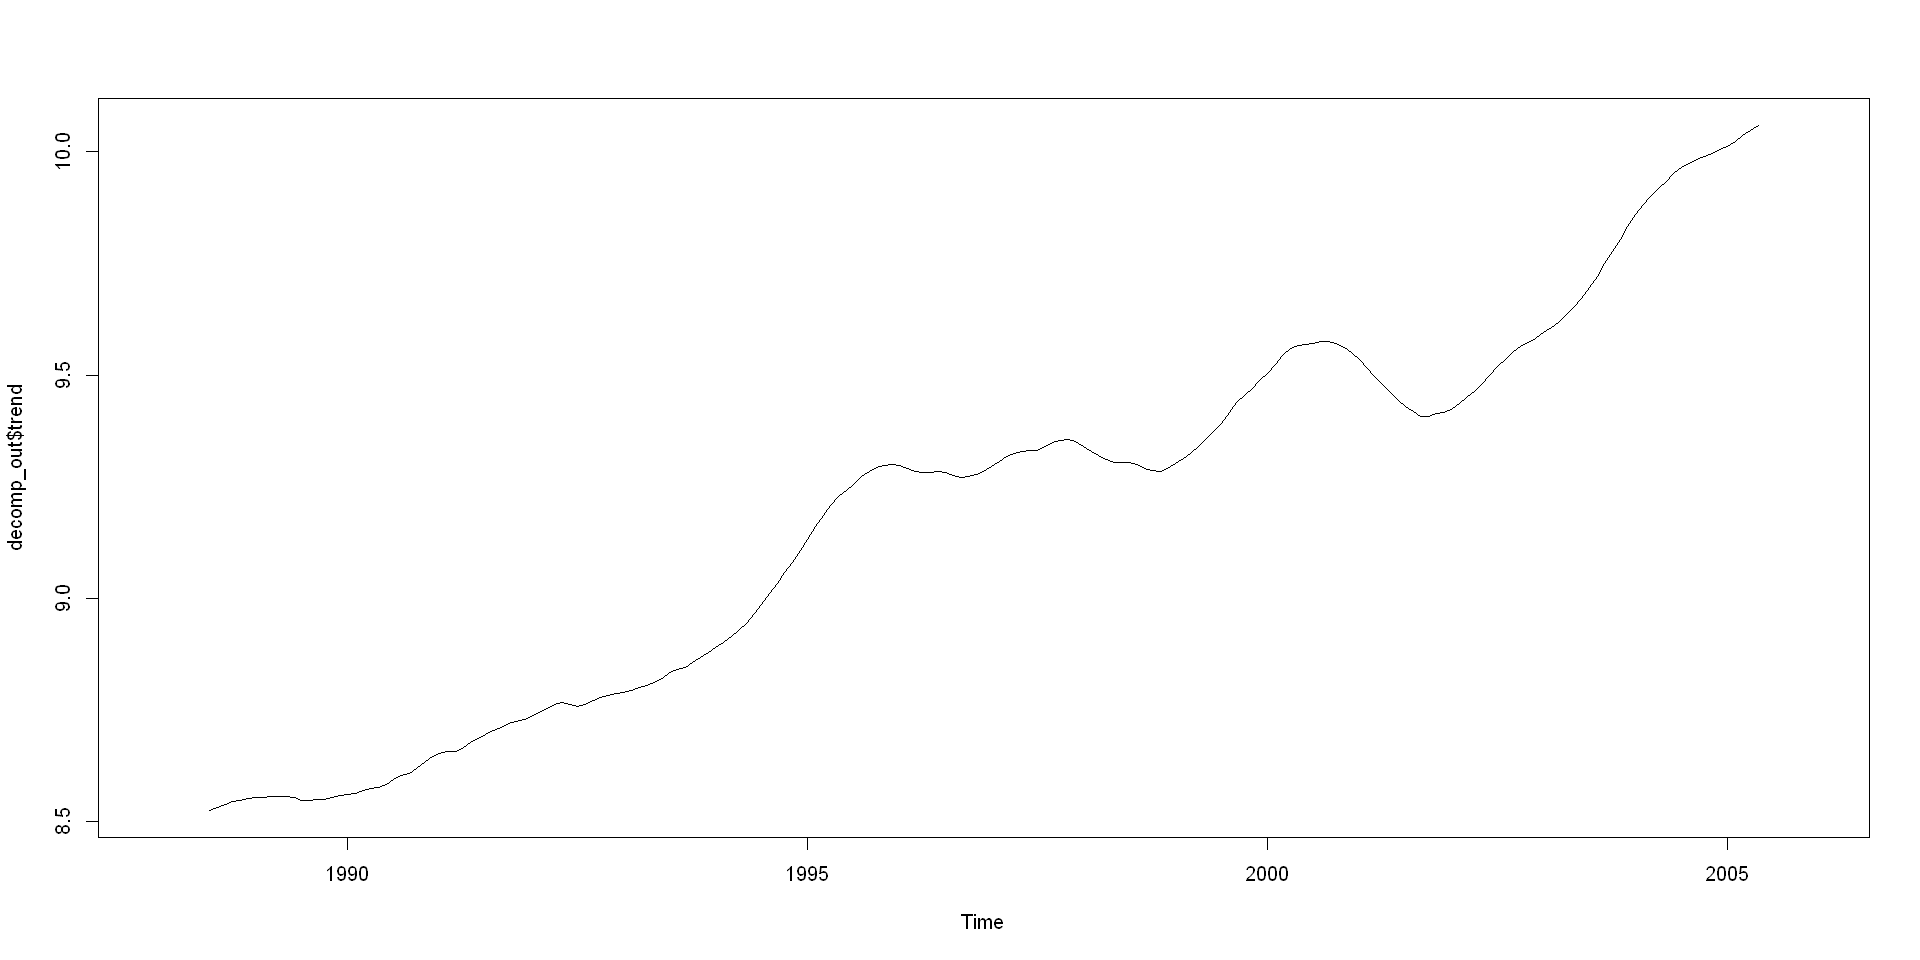

In [258]:
plot(decomp_out$trend)

In [260]:
decomp_out$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1988,NA,NA,NA,NA,NA,NA,8.524909,8.531449,8.538009,8.543836,8.546743,8.551241
1989,8.554463,8.554375,8.554675,8.555680,8.554926,8.552561,8.546942,8.545727,8.548441,8.549405,8.552998,8.557128
1990,8.561084,8.563496,8.568499,8.572934,8.575389,8.583094,8.594780,8.602987,8.608054,8.618382,8.632110,8.645528
1991,8.652480,8.656182,8.656451,8.662890,8.676699,8.684838,8.694924,8.703511,8.710656,8.719050,8.723894,8.727557
1992,8.735643,8.744232,8.753537,8.762913,8.765570,8.761348,8.756939,8.762407,8.771404,8.776919,8.781985,8.785710
1993,8.788833,8.793225,8.799012,8.804420,8.810720,8.821024,8.832465,8.839711,8.845555,8.854876,8.866559,8.878594
1994,8.889805,8.901593,8.913848,8.926946,8.943529,8.964617,8.986476,9.009531,9.033671,9.056742,9.081111,9.106401
1995,9.132387,9.159646,9.185185,9.207737,9.227706,9.240700,9.254871,9.271723,9.284862,9.293293,9.297460,9.299917
1996,9.297720,9.291511,9.283803,9.281053,9.281978,9.283356,9.281056,9.274890,9.271320,9.272877,9.277592,9.283272
1997,9.294459,9.307260,9.317959,9.325326,9.328999,9.331261,9.331807,9.339199,9.349185,9.353986,9.354772,9.350116


In [263]:
x_tilde <- log(series) - decomp_out$seasonal # x_tilde = x - S_5
adjusted <- exp(x_tilde) # 변환

In [265]:
adj_series <- ts(adjusted, start = c(1988,1), frequency = 12)
adj_series

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1988,4546.032,4621.058,4628.182,4635.268,4713.702,4783.146,5329.913,5522.953,5361.729,5024.112,5501.507,5730.333
1989,5054.007,4862.924,5147.936,4792.822,4888.130,5138.230,5360.522,5479.749,5443.044,5069.931,5354.060,5563.241
1990,4548.954,5247.636,5091.585,4959.266,5149.581,5385.584,5623.639,5534.706,6076.445,5051.467,5699.796,6287.357
1991,5328.024,5455.744,5530.650,5849.841,6069.310,6305.439,5675.393,5993.823,5647.321,6343.622,6322.349,6891.019
1992,6192.634,5768.236,6209.581,6373.047,6257.822,6677.496,6507.071,6424.417,6587.160,6811.010,6276.172,6272.825
1993,6119.844,6655.342,6679.025,6763.548,6658.934,6862.103,6824.736,6806.393,7143.941,7150.435,6954.065,7249.763
1994,6968.359,6955.015,7353.724,7682.968,7759.298,7861.148,7796.697,7906.040,8253.233,8475.501,8734.753,9574.575
1995,8916.070,9452.755,9657.319,10177.701,10512.510,10646.272,10741.260,11039.106,10910.525,11015.478,10853.046,10525.803
1996,11395.750,11082.590,11290.855,10657.439,11095.214,10699.891,10138.507,10076.117,9934.509,11325.111,10793.137,10940.250
1997,10375.331,10498.131,10940.664,11417.296,11597.668,11731.271,12095.300,11483.532,11268.881,11914.799,11204.563,11126.363


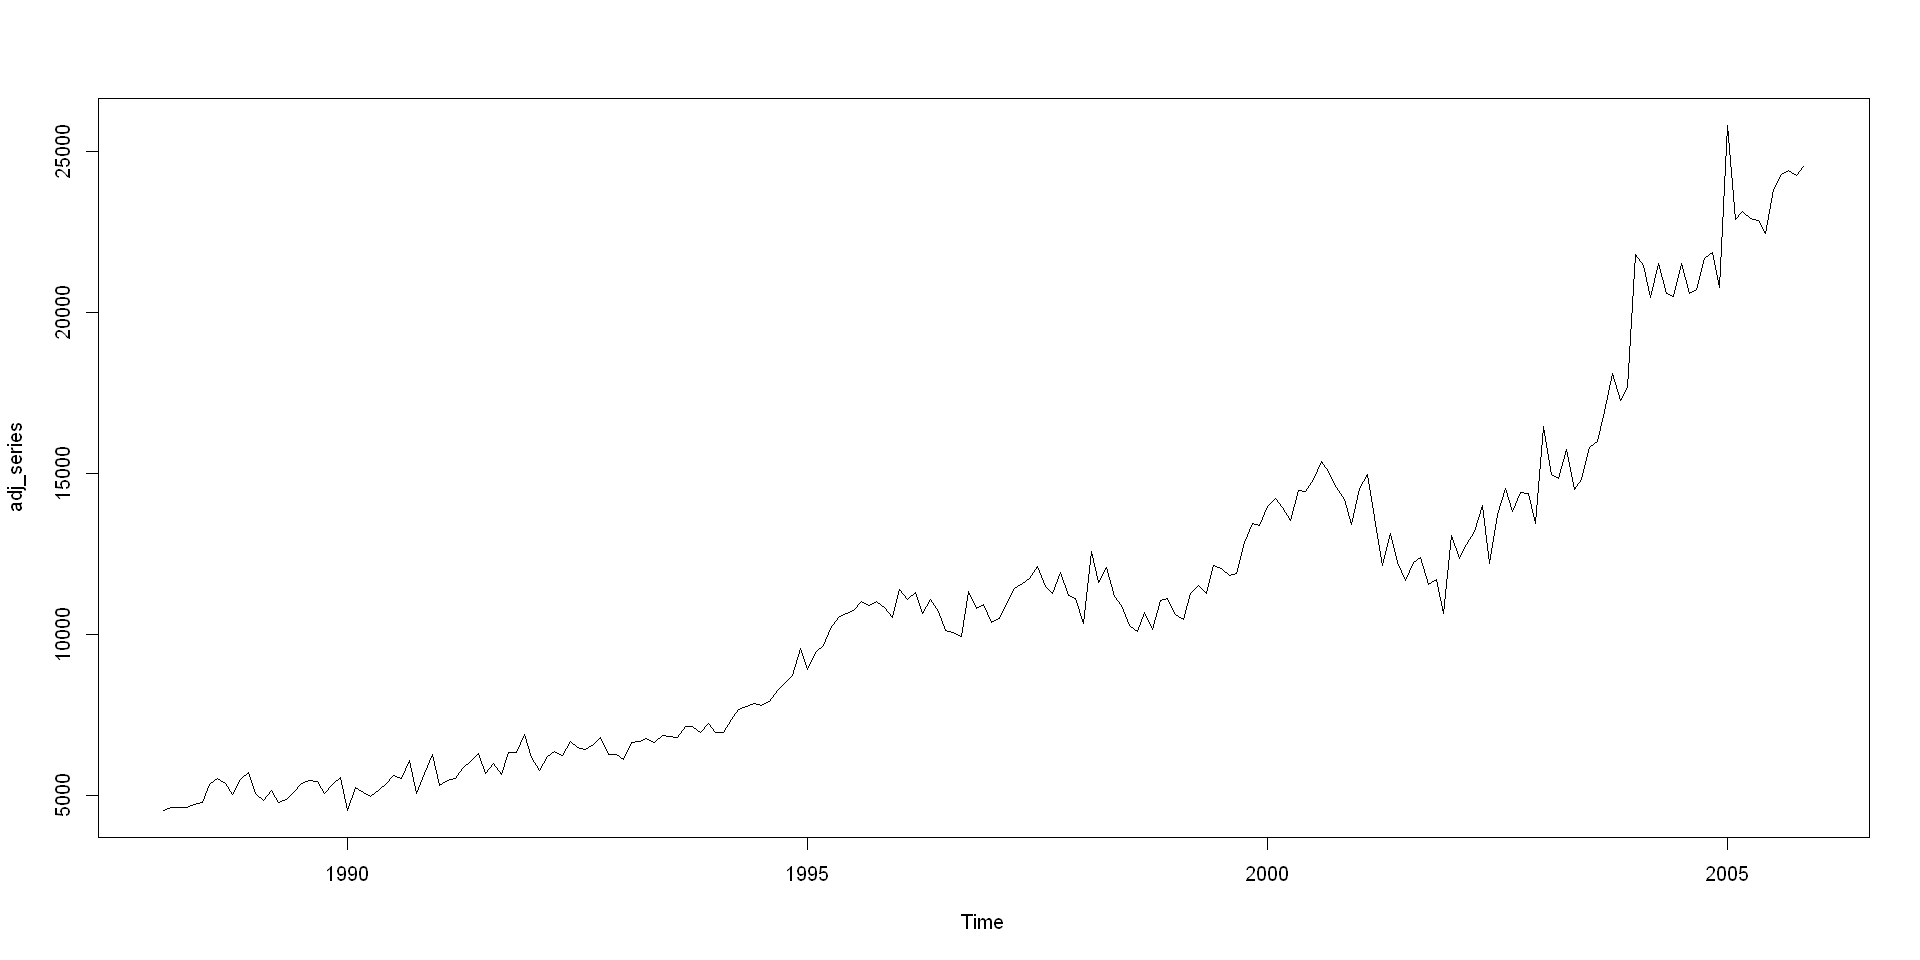

In [266]:
plot(adj_series)

## 자기상관과 다중 시계열

In [4]:
geyser$waiting

[1]  80  71  57  80  75  77  60  86  77  56  81  50  89  54  90  73  60  83
 [19]  65  82  84  54  85  58  79  57  88  68  76  78  74  85  75  65  76  58
 [37]  91  50  87  48  93  54  86  53  78  52  83  60  87  49  80  60  92  43
 [55]  89  60  84  69  74  71 108  50  77  57  80  61  82  48  81  73  62  79
 [73]  54  80  73  81  62  81  71  79  81  74  59  81  66  87  53  80  50  87
 [91]  51  82  58  81  49  92  50  88  62  93  56  89  51  79  58  82  52  88
[109]  52  78  69  75  77  53  80  55  87  53  85  61  93  54  76  80  81  59
[127]  86  78  71  77  76  94  75  50  83  82  72  77  75  65  79  72  78  77
[145]  79  75  78  64  80  49  88  54  85  51  96  50  80  78  81  72  75  78
[163]  87  69  55  83  49  82  57  84  57  84  73  78  57  79  57  90  62  87
[181]  78  52  98  48  78  79  65  84  50  83  60  80  50  88  50  84  74  76
[199]  65  89  49  88  51  78  85  65  75  77  69  92  68  87  61  81  55  93
[217]  53  84  70  73  93  50  87  77  74  72  82  74  80  49  91  53  86  49
[235]  79  89  87  76  59  80  89  45  93  72  71  54  79  74  65  78  57  87
[253]  72  84  47  84  57  87  68  86  75  73  53  82  93  77  54  96  48  89
[271]  63  84  76  62  83  50  85  78  78  81  78  76  74  81  66  84  48  93
[289]  47  87  51  78  54  87  52  85  58  88  79

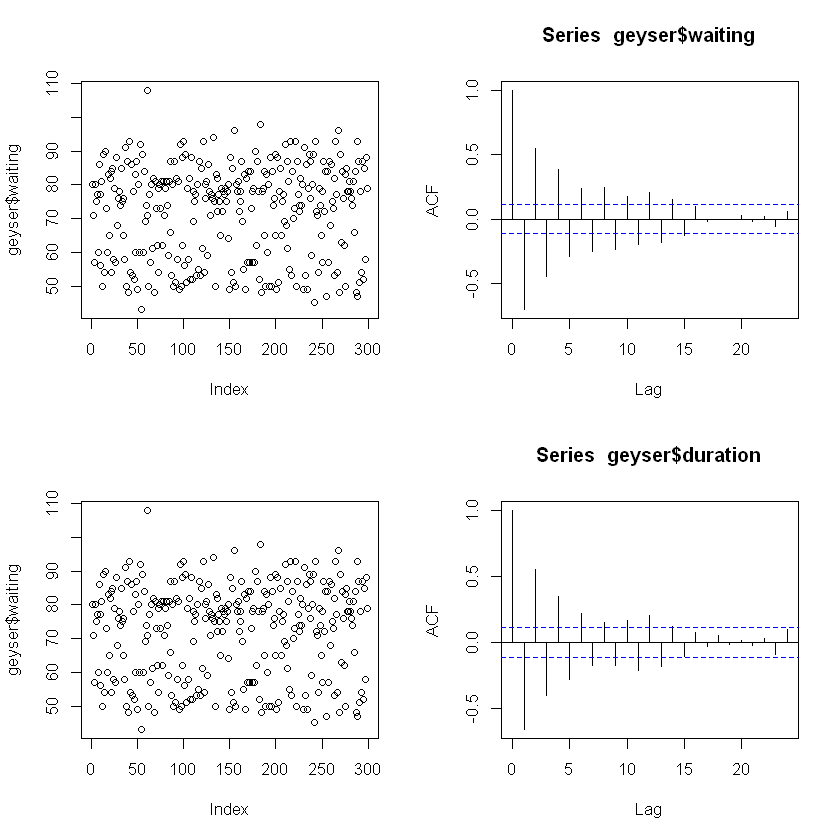

In [2]:
par(mfrow = c(2,2))
library(MASS)
plot(geyser$waiting)
acf(geyser$waiting)
plot(geyser$waiting)
acf(geyser$duration)

[1]  1.000 -0.702  0.547 -0.445  0.386

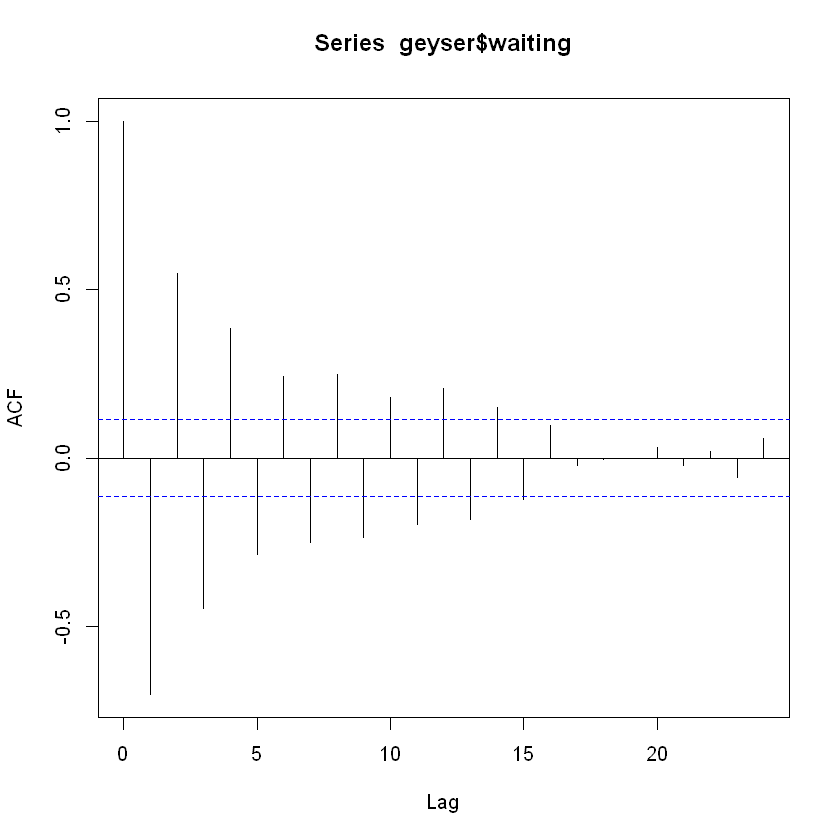

[1]  1.000 -0.657  0.553 -0.398  0.346

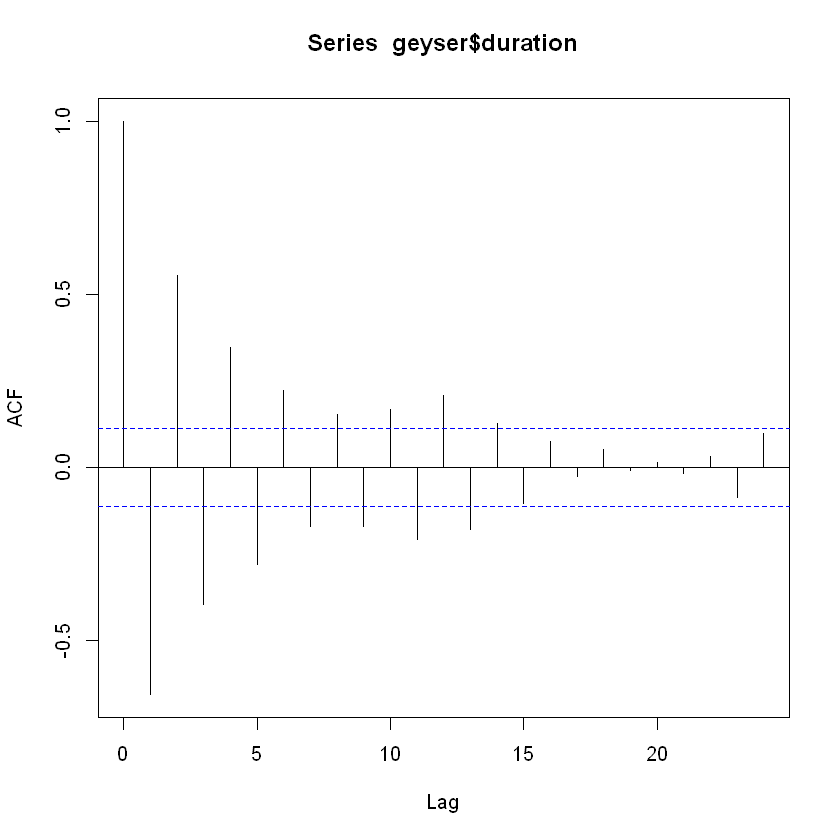

In [5]:
# waiting과 duration에 대한 시차 0,1,2,3,4 에서의 자기상관은 각각 다음과 같다.
round(acf(geyser$waiting)$acf[1:5],3)
round(acf(geyser$duration)$acf[1:5],3)

waiting과 duration 사이의 관계는 어떨까? 이것은 다음과 같이 정의되는 교차상관함수(CCF)로 알 수 있다.

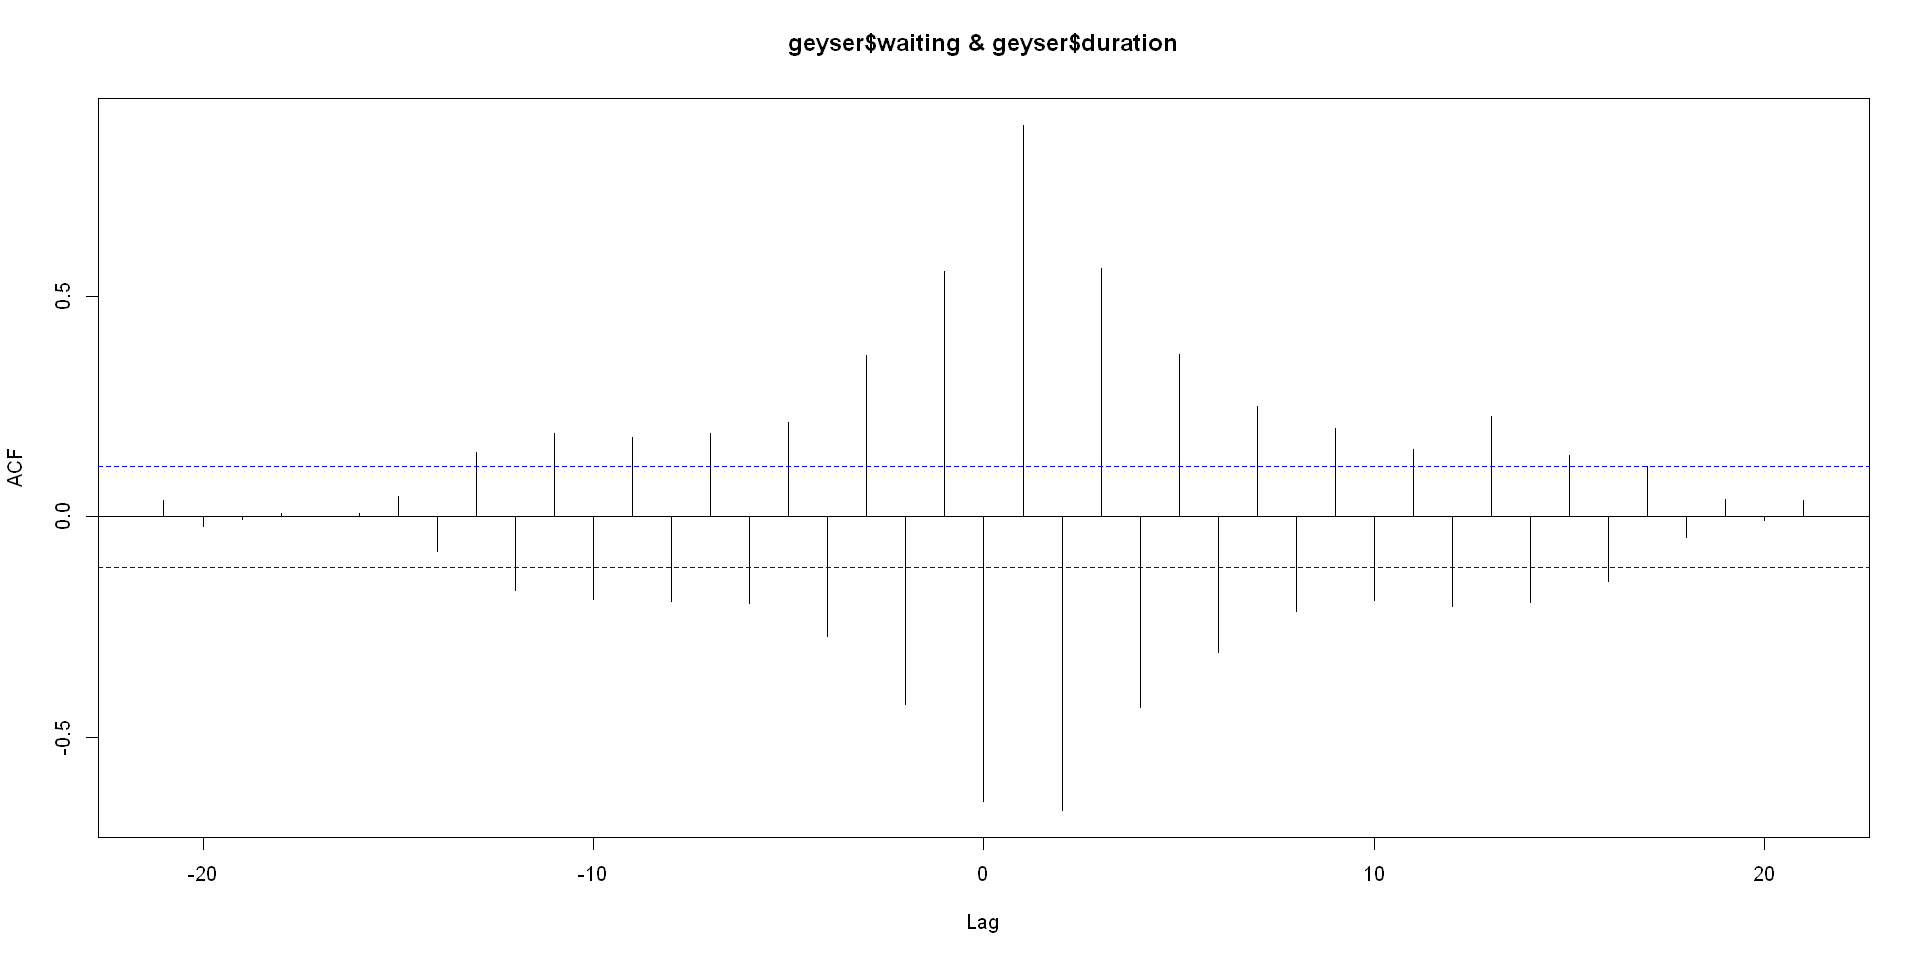

In [292]:
ccf(geyser$waiting, geyser$duration)

-21,0.038
-20,-0.023
-19,-0.005
-18,0.009
-17,0.000
-16,0.009
-15,0.046
-14,-0.079
-13,0.146
-12,-0.166
-11,0.190


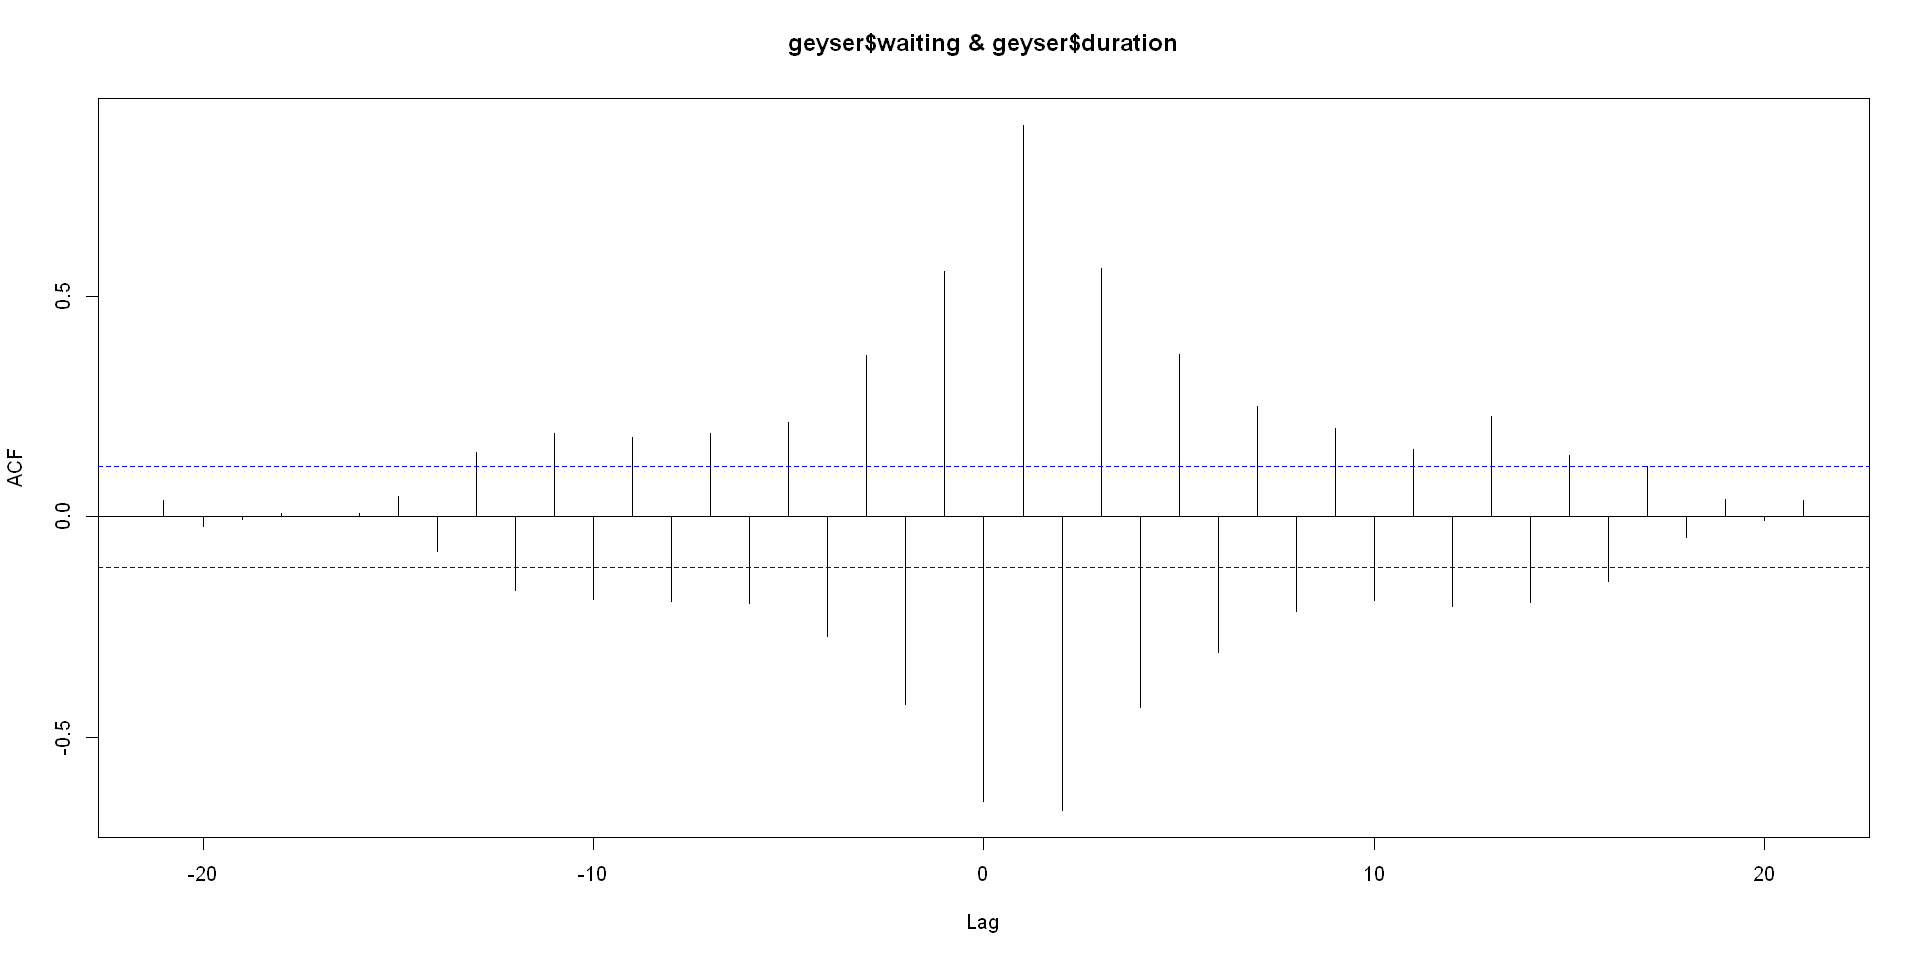

In [295]:
round(cbind(ccf(geyser$waiting, geyser$duration)$lag, ccf(geyser$waiting, geyser$duration)$acf), 3)

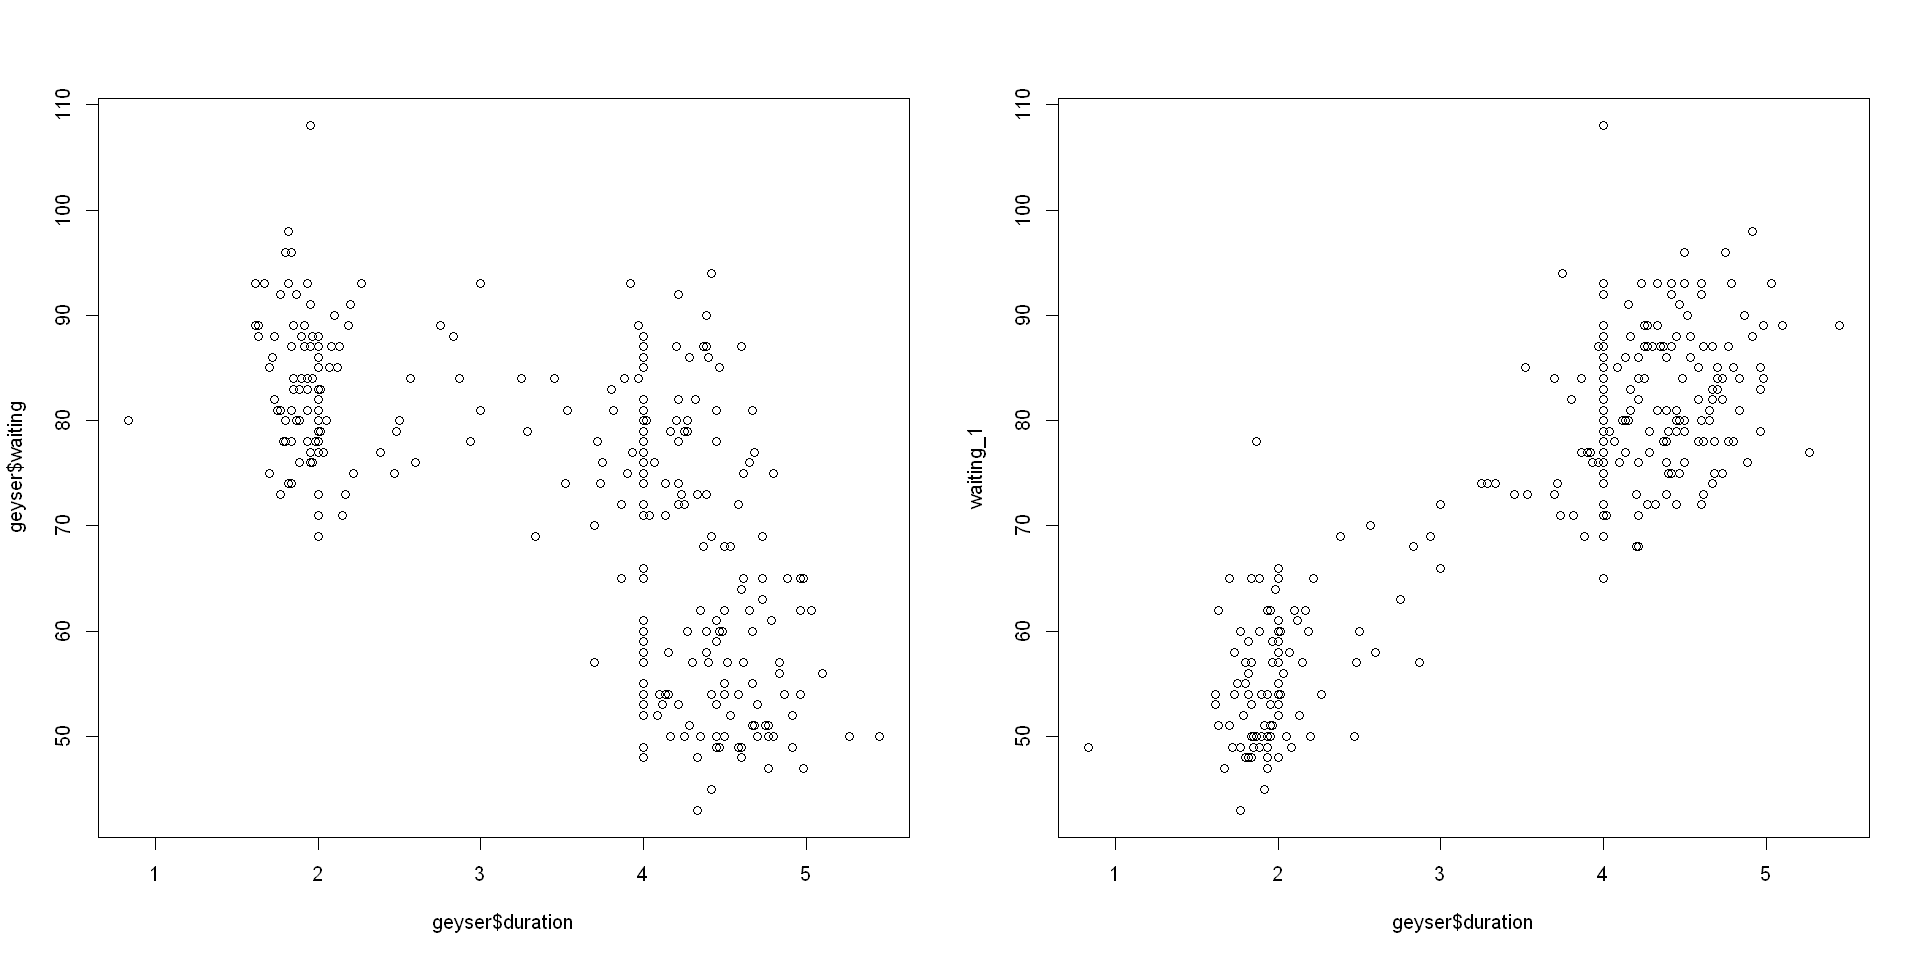

In [298]:
par(mfrow = c(1,2))
plot(geyser$duration, geyser$waiting)
waiting_1 <- c(geyser$waiting[2:299], NA)
plot(waiting_1 ~ geyser$duration)

## 주가 사례: 임의보행

In [299]:
library(foreign)

In [313]:
ee <- read.spss('dataset/EDA/EEstock2000.sav')
x <- ee$change

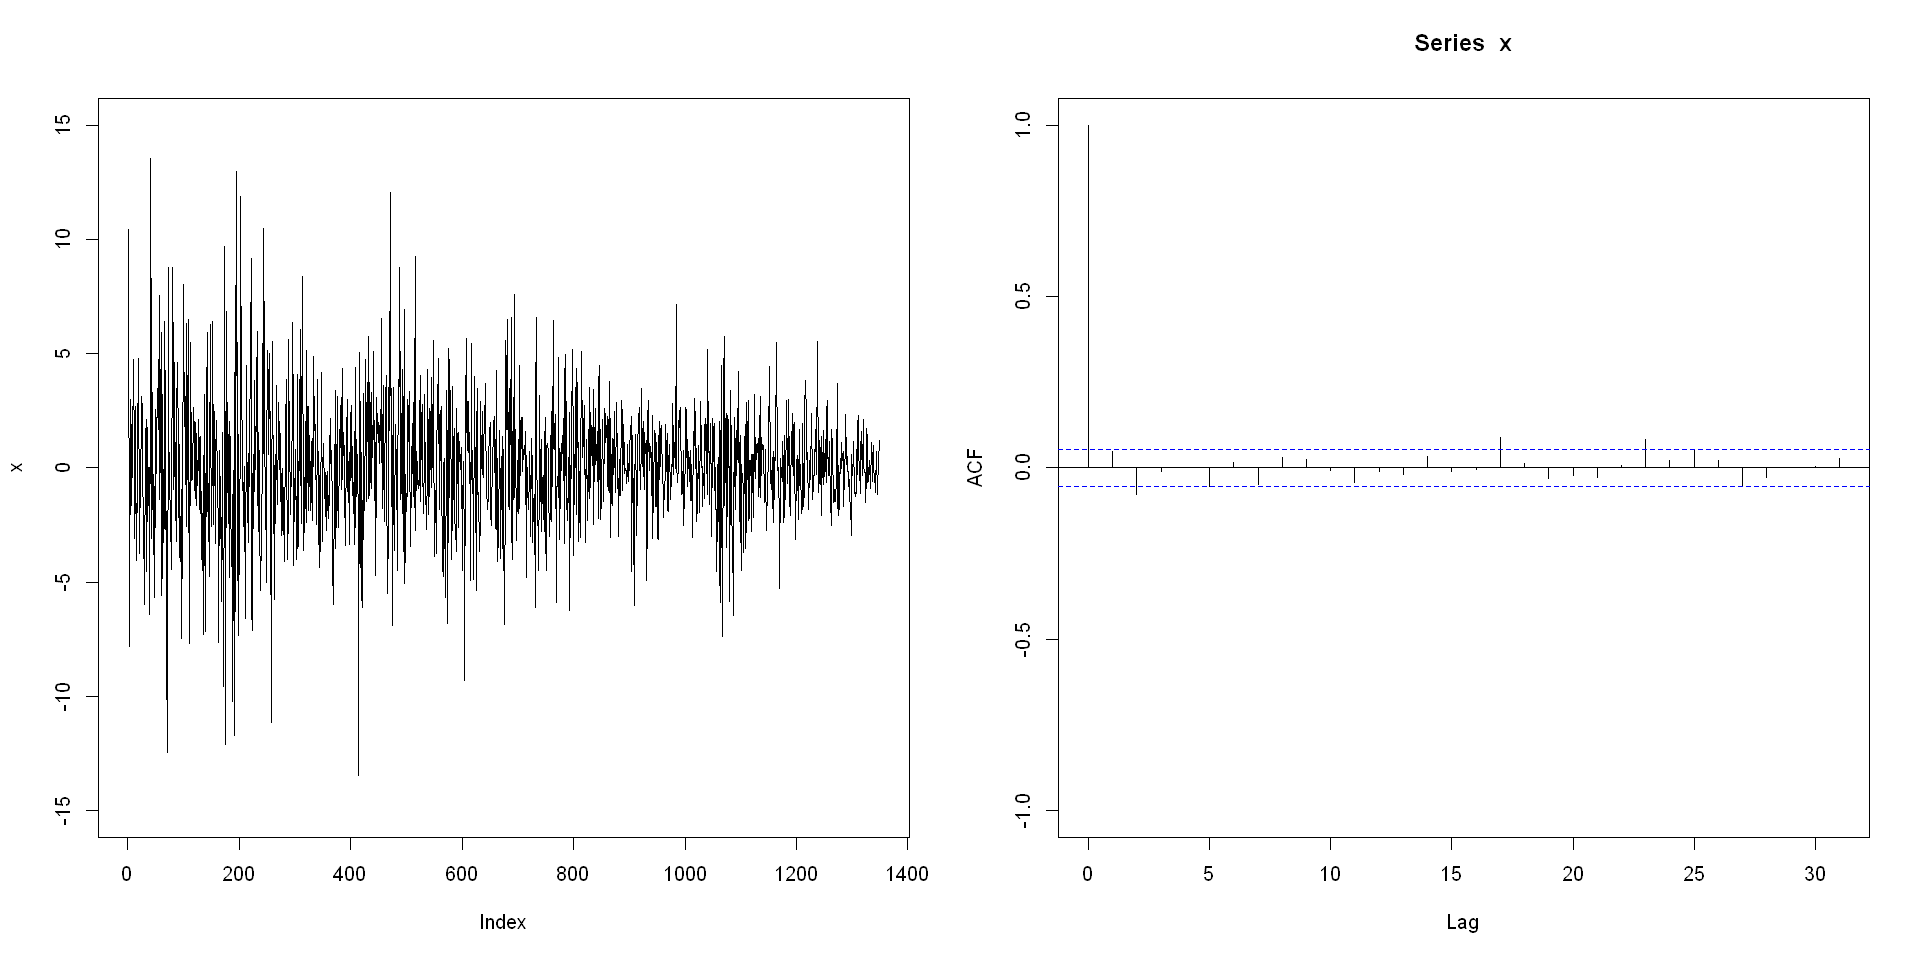

In [317]:
par(mfrow = c(1,2))
plot(x, type = 'l', ylim = c(-15, 15))
acf(x, ylim = c(-1, 1))

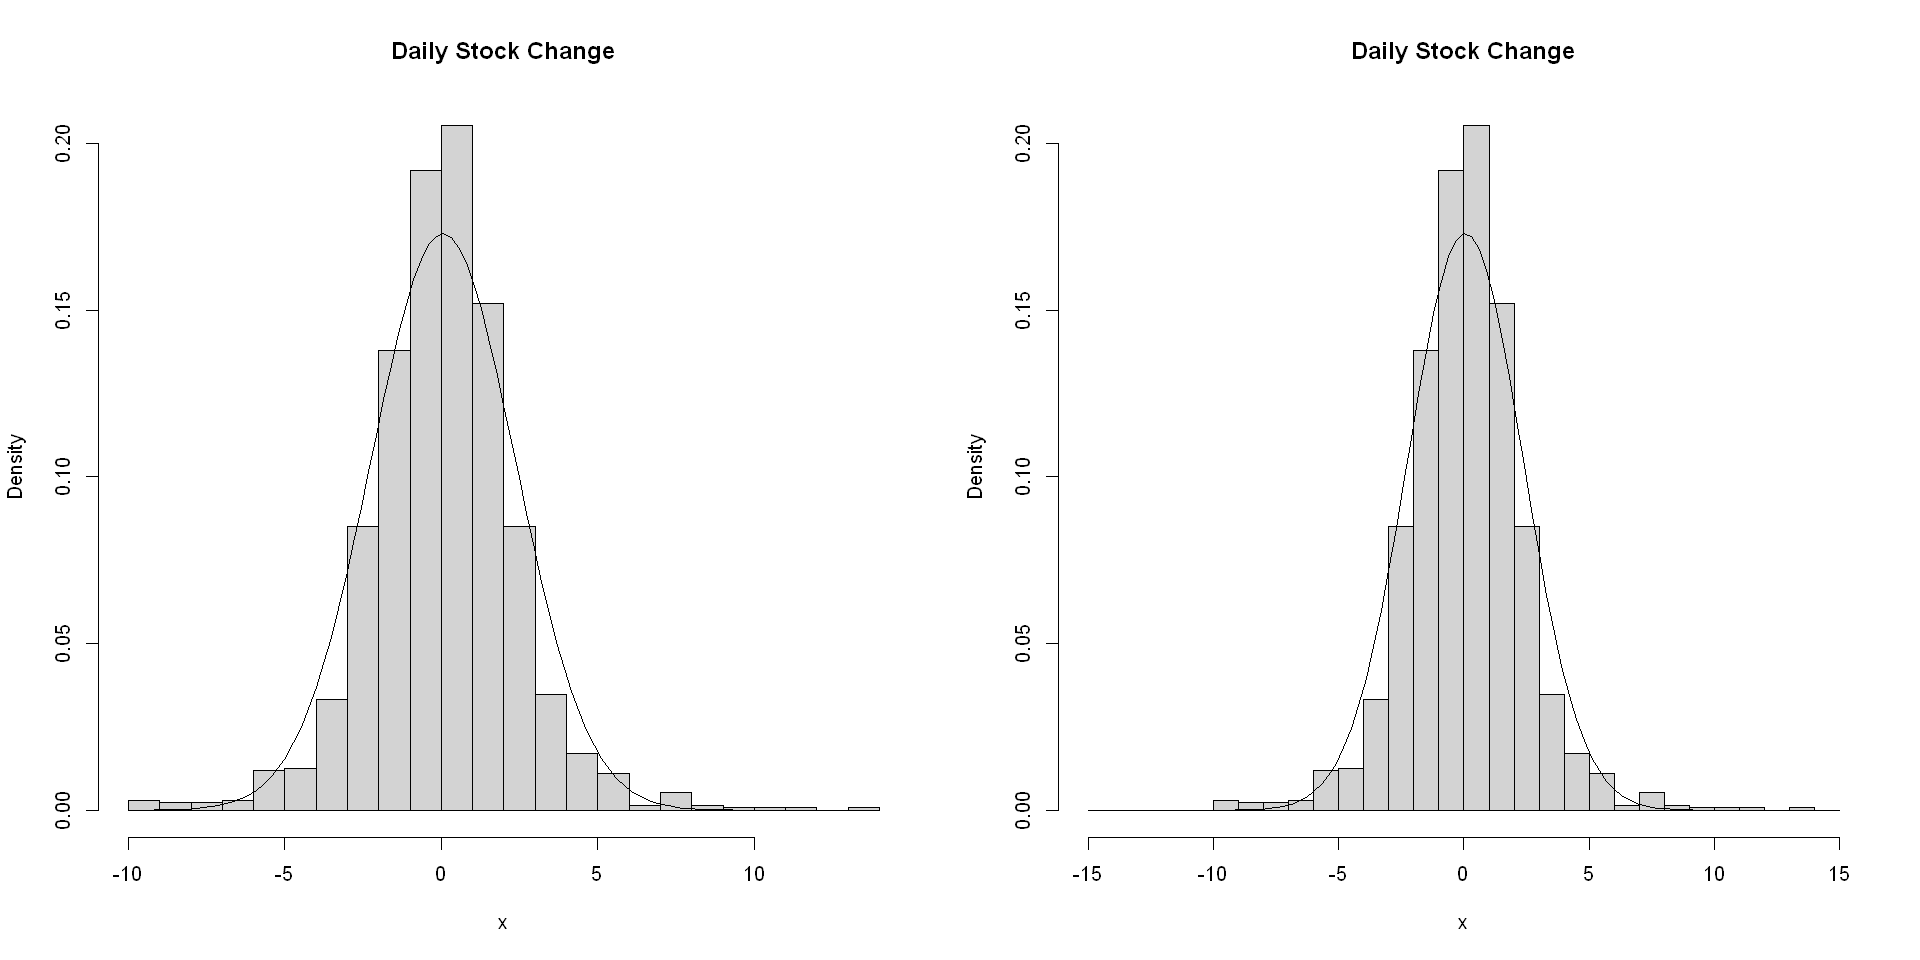

In [326]:
par(mfrow = c(1,2))
m <- mean(x)
sd <- sd(x)
hist(x, freq=F, nclass = 20, main = 'Daily Stock Change')
curve(dnorm(x, m, sd), add = T)

ms <- read.spss('dataset/EDA/MSstock2000.sav')
x <- ms$change
m <- mean(x)
sd <- sd(x)
hist(x, freq = F, nclass = 20, xlim = c(-15, 15), main = 'Daily Stock Change')
curve(dnorm(x, m, sd), add = T)

# Ch.9 로버스트 선형회귀

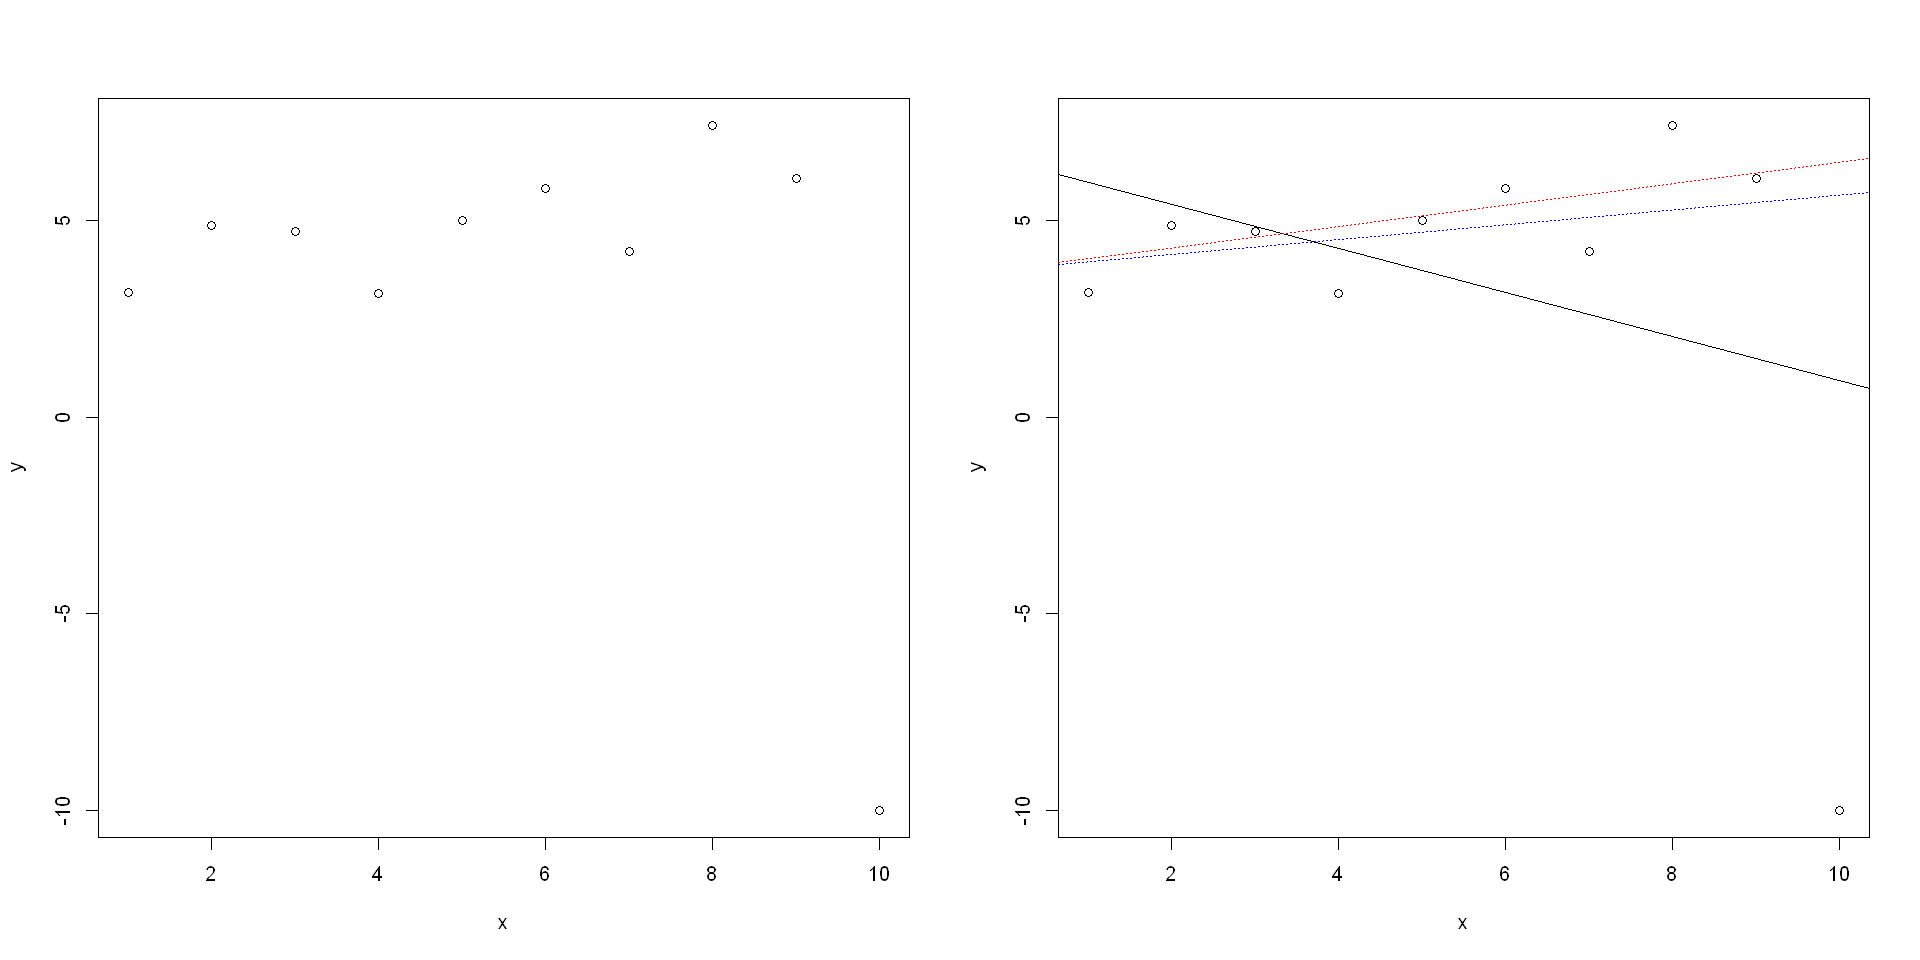

In [5]:
set.seed(1234567)
x <- seq(1,10)
y <- 2.5 + 0.5*x + rnorm(10,0,1)
y[10] <- -10
par(mfrow=c(1,2))
plot(y~x)
library(MASS)
m0 <- lm(y ~ x)
m1 <- rlm(y ~ x)
m2 <- lqs(y ~ x)
plot(y ~ x)
abline(m0$coef)
abline(m1$coef, lty = 'dotted', col = 'blue')
abline(m2$coef, lty = 'dotted', col = 'red')

# Ch.10 이변량 자료 탐색

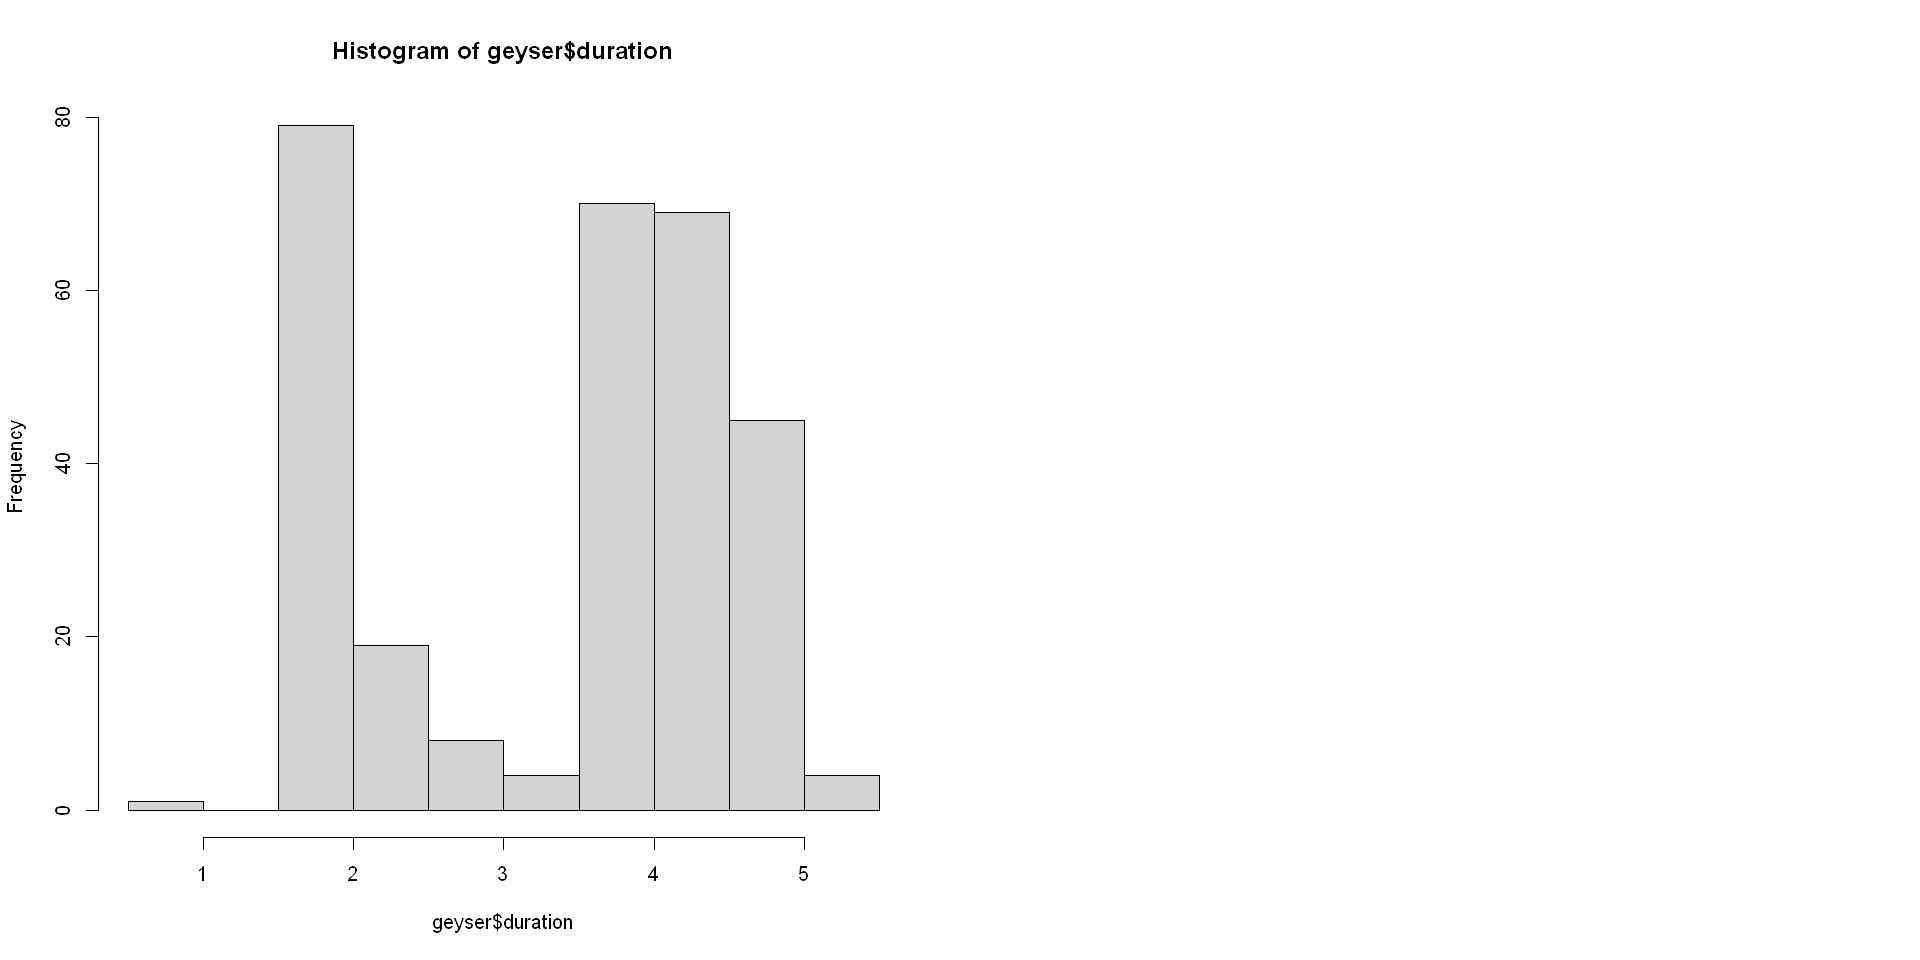

In [9]:
par(mfrow = c(1,2))
library(MASS)
data(geyser)
hist(geyser$duration)

In [10]:
density(geyser$duration)


Call:
	density.default(x = geyser$duration)

Data: geyser$duration (299 obs.);	Bandwidth 'bw' = 0.3304

       x                 y            
 Min.   :-0.1578   Min.   :0.0000454  
 1st Qu.: 1.4919   1st Qu.:0.0070880  
 Median : 3.1417   Median :0.0815875  
 Mean   : 3.1417   Mean   :0.1513899  
 3rd Qu.: 4.7914   3rd Qu.:0.2768205  
 Max.   : 6.4411   Max.   :0.5154276  

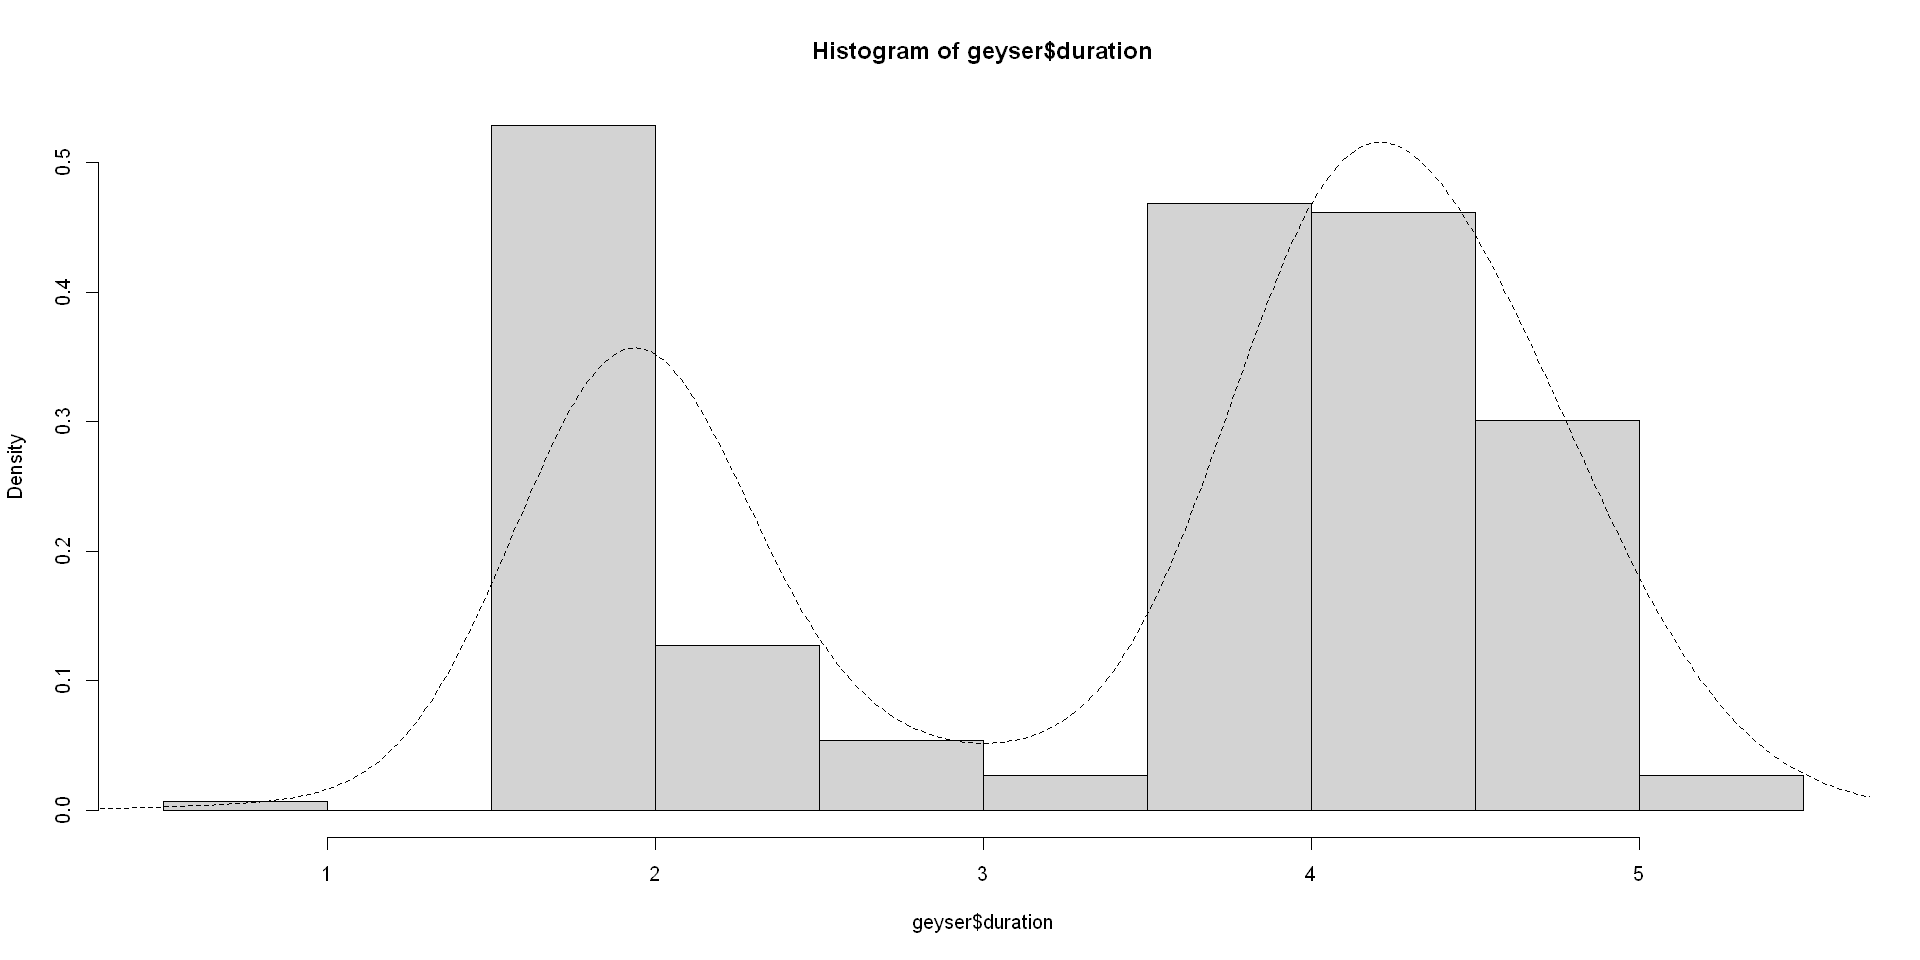

In [11]:
hist(geyser$duration, freq = F)
lines(density(geyser$duration), lty = 2)

In [ ]:
ker <- function(n

In [14]:
geyser$duration %>% length()

[1] 299

In [ ]:
1/299 * sum(

In [15]:
d <- density(rnorm(10000))

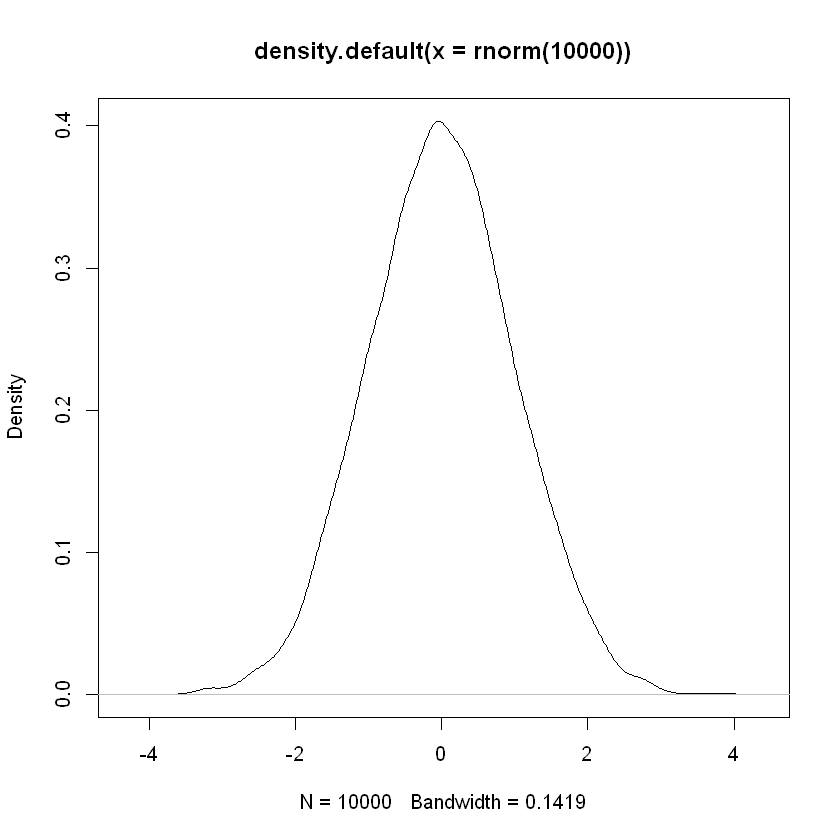

In [16]:
plot(d)

In [21]:
approx(d$x, d$y, xout = c(-2, 0, 2))

$x
[1] -2  0  2

$y
[1] 0.05090090 0.40249151 0.05928839

In [19]:
d$x

[1] -4.346573957 -4.329437764 -4.312301572 -4.295165380 -4.278029187
  [6] -4.260892995 -4.243756803 -4.226620610 -4.209484418 -4.192348226
 [11] -4.175212034 -4.158075841 -4.140939649 -4.123803457 -4.106667264
 [16] -4.089531072 -4.072394880 -4.055258687 -4.038122495 -4.020986303
 [21] -4.003850111 -3.986713918 -3.969577726 -3.952441534 -3.935305341
 [26] -3.918169149 -3.901032957 -3.883896764 -3.866760572 -3.849624380
 [31] -3.832488188 -3.815351995 -3.798215803 -3.781079611 -3.763943418
 [36] -3.746807226 -3.729671034 -3.712534841 -3.695398649 -3.678262457
 [41] -3.661126265 -3.643990072 -3.626853880 -3.609717688 -3.592581495
 [46] -3.575445303 -3.558309111 -3.541172919 -3.524036726 -3.506900534
 [51] -3.489764342 -3.472628149 -3.455491957 -3.438355765 -3.421219572
 [56] -3.404083380 -3.386947188 -3.369810996 -3.352674803 -3.335538611
 [61] -3.318402419 -3.301266226 -3.284130034 -3.266993842 -3.249857649
 [66] -3.232721457 -3.215585265 -3.198449073 -3.181312880 -3.164176688
 [71] -3.147040496 -3.129904303 -3.112768111 -3.095631919 -3.078495726
 [76] -3.061359534 -3.044223342 -3.027087150 -3.009950957 -2.992814765
 [81] -2.975678573 -2.958542380 -2.941406188 -2.924269996 -2.907133803
 [86] -2.889997611 -2.872861419 -2.855725227 -2.838589034 -2.821452842
 [91] -2.804316650 -2.787180457 -2.770044265 -2.752908073 -2.735771881
 [96] -2.718635688 -2.701499496 -2.684363304 -2.667227111 -2.650090919
[101] -2.632954727 -2.615818534 -2.598682342 -2.581546150 -2.564409958
[106] -2.547273765 -2.530137573 -2.513001381 -2.495865188 -2.478728996
[111] -2.461592804 -2.444456611 -2.427320419 -2.410184227 -2.393048035
[116] -2.375911842 -2.358775650 -2.341639458 -2.324503265 -2.307367073
[121] -2.290230881 -2.273094688 -2.255958496 -2.238822304 -2.221686112
[126] -2.204549919 -2.187413727 -2.170277535 -2.153141342 -2.136005150
[131] -2.118868958 -2.101732765 -2.084596573 -2.067460381 -2.050324189
[136] -2.033187996 -2.016051804 -1.998915612 -1.981779419 -1.964643227
[141] -1.947507035 -1.930370843 -1.913234650 -1.896098458 -1.878962266
[146] -1.861826073 -1.844689881 -1.827553689 -1.810417496 -1.793281304
[151] -1.776145112 -1.759008920 -1.741872727 -1.724736535 -1.707600343
[156] -1.690464150 -1.673327958 -1.656191766 -1.639055573 -1.621919381
[161] -1.604783189 -1.587646997 -1.570510804 -1.553374612 -1.536238420
[166] -1.519102227 -1.501966035 -1.484829843 -1.467693650 -1.450557458
[171] -1.433421266 -1.416285074 -1.399148881 -1.382012689 -1.364876497
[176] -1.347740304 -1.330604112 -1.313467920 -1.296331727 -1.279195535
[181] -1.262059343 -1.244923151 -1.227786958 -1.210650766 -1.193514574
[186] -1.176378381 -1.159242189 -1.142105997 -1.124969805 -1.107833612
[191] -1.090697420 -1.073561228 -1.056425035 -1.039288843 -1.022152651
[196] -1.005016458 -0.987880266 -0.970744074 -0.953607882 -0.936471689
[201] -0.919335497 -0.902199305 -0.885063112 -0.867926920 -0.850790728
[206] -0.833654535 -0.816518343 -0.799382151 -0.782245959 -0.765109766
[211] -0.747973574 -0.730837382 -0.713701189 -0.696564997 -0.679428805
[216] -0.662292612 -0.645156420 -0.628020228 -0.610884036 -0.593747843
[221] -0.576611651 -0.559475459 -0.542339266 -0.525203074 -0.508066882
[226] -0.490930689 -0.473794497 -0.456658305 -0.439522113 -0.422385920
[231] -0.405249728 -0.388113536 -0.370977343 -0.353841151 -0.336704959
[236] -0.319568767 -0.302432574 -0.285296382 -0.268160190 -0.251023997
[241] -0.233887805 -0.216751613 -0.199615420 -0.182479228 -0.165343036
[246] -0.148206844 -0.131070651 -0.113934459 -0.096798267 -0.079662074
[251] -0.062525882 -0.045389690 -0.028253497 -0.011117305  0.006018887
[256]  0.023155079  0.040291272  0.057427464  0.074563656  0.091699849
[261]  0.108836041  0.125972233  0.143108426  0.160244618  0.177380810
[266]  0.194517002  0.211653195  0.228789387  0.245925579  0.263061772
[271]  0.280197964  0.297334156  0.314470349  0.331606541  0.348742733
[276]  0.365878925  0.383015118  0.400151310  0.417287502  0.434423695
[281]  0.451559887  0.4686

[^1] 로버스트(robust) 한 통계량은 이상치/에러값으로 부터 영향을 크게 받지 않는 (건장한) 통계량

